In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

desc = 'descrittore_finale_games.xlsx'
desc_read = pd.read_excel( desc )
desc_data = pd.DataFrame( desc_read )

#idx_ANNI_PESATI_CORRENTE = []
#for idx,v in enumerate ( list( desc_data.columns ) ):
#    if ( 'LAST' in v ) :
#        idx_ANNI_PESATI_CORRENTE.append( idx )
        
# ATTENZIONE ALLA COLONNA DA ELIMINARE
desc_data = desc_data.iloc[:, 1:]
desc_data

,PARTITE,1diff_Top50,1diff_Top40,1diff_Top30,1diff_Top25,1diff_Top20,1diff_Top15,1diff_Top10,1diff_Top5,2diff_Top50,...,Last_36month_SLAMProba_n1_win_set1_loose_set2,Last_36month_SLAMProba_n1_win_in_3sets,Last_36month_SLAMProba_n1_loose_in_3sets,Last_36month_SLAMProba_n2_win_set1,Last_36month_SLAMProba_n2_win_set1_and_set2,Last_36month_SLAMProba_n2_win_set1_loose_set2,Last_36month_SLAMProba_n2_win_in_3sets,Last_36month_SLAMProba_n2_loose_in_3sets,Last_36month_SLAMRapporto_player1_loose_set1_win_set2,Last_36month_SLAMRapporto_player2_loose_set1_win_set2
0,QRT_GROSJEAN_DAVYDENKO_3_DOHA_2005_HARD_,0,0,0,1,1,1,0,0,0,...,10.596505,0.000000,8.300251,38.879191,14.407545,21.611318,9.829895,6.361772,0.443213,0.331492
1,F_LJUBICIC_FEDERER_3_DOHA_2005_HARD_,0,0,0,0,-1,-1,-1,-1,0,...,22.618766,10.613771,5.148548,63.355235,52.147107,8.876103,3.514646,3.514646,0.110803,0.522565
2,SF_DAVYDENKO_FEDERER_3_DOHA_2005_HARD_,0,0,0,-1,-1,-1,-1,-1,0,...,17.396638,7.912850,5.121087,66.217755,54.503221,9.277144,3.673445,3.673445,0.331492,0.522565
3,SF_COSTA_LJUBICIC_3_DOHA_2005_HARD_,-1,-1,-1,-1,0,0,0,0,0,...,18.992042,8.294154,6.471509,51.351568,14.123330,33.895993,15.905567,7.715503,0.271493,0.110803
4,QRT_SANTORO_COSTA_3_DOHA_2005_HARD_,0,0,0,0,0,0,0,0,-1,...,22.362136,9.047715,12.882980,47.969118,24.248398,20.206998,8.824746,6.885504,0.459770,0.271493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12265,QRT_ISNER_O'CONNELL_3_ATLANTA_2021_HARD,1,1,1,1,0,0,0,0,1,...,45.223349,20.638292,18.923691,0.000000,0.000000,0.000000,0.000000,0.000000,0.373832,0.000000
12266,SF_NAKASHIMA_RUUSUVUORI_3_ATLANTA_2021_HARD,0,0,0,0,0,0,0,0,0,...,33.754797,13.817376,13.817376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12267,SF_ISNER_FRITZ_3_ATLANTA_2021_HARD,0,0,0,1,0,0,0,0,0,...,26.511799,12.099021,11.093851,41.375861,26.600436,12.091107,5.101706,3.957785,0.373832,0.186916
12268,F_ISNER_NAKASHIMA_3_ATLANTA_2021_HARD,1,1,1,1,0,0,0,0,1,...,29.124663,13.291437,12.187203,35.598173,19.620800,13.080534,5.354458,5.354458,0.373832,0.000000


In [2]:
data_predire = 'descrittore_finale_games_PREDICT.xlsx'
data_predire_read = pd.read_excel( data_predire )
data_predire_data = pd.DataFrame( data_predire_read )
partite_nuove = data_predire_data.iloc[:,1]
data_predire_data = data_predire_data.iloc[:,2:]
print( partite_nuove )
data_predire_data

0           OTT_SINNER_KORDA_3_WASHINGTON_2021_HARD
1           OTT_KORDA_SINNER_3_WASHINGTON_2021_HARD
2       OTT_BERANKIS_JOHNSON_3_WASHINGTON_2021_HARD
3       OTT_JOHNSON_BERANKIS_3_WASHINGTON_2021_HARD
4        OTT_KUDLA_NAKASHIMA_3_WASHINGTON_2021_HARD
5        OTT_NAKASHIMA_KUDLA_3_WASHINGTON_2021_HARD
6         OTT_MILLMAN_OPELKA_3_WASHINGTON_2021_HARD
7         OTT_OPELKA_MILLMAN_3_WASHINGTON_2021_HARD
8       OTT_NORRIE_NISHIKORI_3_WASHINGTON_2021_HARD
9       OTT_NISHIKORI_NORRIE_3_WASHINGTON_2021_HARD
10    OTT_BROOKSBY_ALIASSIME_3_WASHINGTON_2021_HARD
11    OTT_ALIASSIME_BROOKSBY_3_WASHINGTON_2021_HARD
12      OTT_IVASHKA_MCDONALD_3_WASHINGTON_2021_HARD
13      OTT_MCDONALD_IVASHKA_3_WASHINGTON_2021_HARD
14          OTT_NADAL_HARRIS_3_WASHINGTON_2021_HARD
15          OTT_HARRIS_NADAL_3_WASHINGTON_2021_HARD
16      QRT_MILLMAN_BROOKSBY_3_WASHINGTON_2021_HARD
17      QRT_BROOKSBY_MILLMAN_3_WASHINGTON_2021_HARD
18        QRT_SINNER_JOHNSON_3_WASHINGTON_2021_HARD
19        QR

,1diff_Top50,1diff_Top40,1diff_Top30,1diff_Top25,1diff_Top20,1diff_Top15,1diff_Top10,1diff_Top5,2diff_Top50,2diff_Top40,...,Last_36month_SLAMProba_n1_win_set1_loose_set2,Last_36month_SLAMProba_n1_win_in_3sets,Last_36month_SLAMProba_n1_loose_in_3sets,Last_36month_SLAMProba_n2_win_set1,Last_36month_SLAMProba_n2_win_set1_and_set2,Last_36month_SLAMProba_n2_win_set1_loose_set2,Last_36month_SLAMProba_n2_win_in_3sets,Last_36month_SLAMProba_n2_loose_in_3sets,Last_36month_SLAMRapporto_player1_loose_set1_win_set2,Last_36month_SLAMRapporto_player2_loose_set1_win_set2
0,1,1,0,0,0,0,0,0,0,0,...,26.839882,11.596980,11.596980,24.196945,6.804584,13.609168,5.974204,0.000000,0.298507,0.425532
1,-1,-1,0,0,0,0,0,0,0,0,...,13.609168,5.974204,0.000000,71.318739,40.259823,26.839882,11.596980,11.596980,0.425532,0.298507
2,0,0,0,0,0,0,0,0,0,0,...,13.817790,0.000000,10.585295,63.280891,35.258490,23.505660,8.490022,14.787707,0.869565,0.248447
3,0,0,0,0,0,0,0,0,0,0,...,23.505660,8.490022,14.787707,31.855202,13.817790,13.817790,0.000000,10.585295,0.248447,0.869565
4,0,0,0,0,0,0,0,0,0,0,...,11.136934,4.558854,0.000000,76.812582,46.865681,23.432840,9.167860,9.167860,0.000000,0.493827
5,0,0,0,0,0,0,0,0,0,0,...,23.432840,9.167860,9.167860,16.069746,0.000000,11.136934,4.558854,0.000000,0.493827,0.000000
6,0,0,0,0,0,0,0,0,0,-1,...,13.085593,4.726393,6.944498,53.751649,33.562291,16.781145,7.445473,2.789656,0.552486,0.613027
7,0,0,0,0,0,0,0,0,0,1,...,16.781145,7.445473,2.789656,42.609405,26.171187,13.085593,4.726393,6.944498,0.613027,0.552486
8,-1,0,0,0,0,0,0,0,-1,-1,...,12.146126,5.240429,1.936843,52.186520,36.655868,12.937365,5.388551,5.388551,0.221607,0.459770
9,1,0,0,0,0,0,0,0,1,1,...,12.937365,5.388551,5.388551,45.084587,30.365316,12.146126,5.240429,1.936843,0.459770,0.221607


In [3]:
for idx,v in enumerate ( list( desc_data.columns ) ):
    if 'desc_ANNI_PESATI' in v:
        print( v ,": ", idx )
        print("******************************")
    elif 'Last_36month_SLAMDiffs_win_set1_and_2' in v:
        print( v,": ", idx )
        print("******************************")
    elif 'diffs_ALL_LAST_2' in v:
        print( v,": ", idx )
        print("******************************")
    
    
    

diffs_ALL_LAST_2 :  55
******************************
diffs_ALL_LAST_2_SORPRESA :  67
******************************
desc_ANNI_PESATI :  168
******************************
desc_ANNI_PESATI_SLAM :  169
******************************
Last_36month_SLAMDiffs_win_set1_and_2 :  216
******************************


In [4]:
print( list( desc_data.columns )  ) 

['PARTITE', '1diff_Top50', '1diff_Top40', '1diff_Top30', '1diff_Top25', '1diff_Top20', '1diff_Top15', '1diff_Top10', '1diff_Top5', '2diff_Top50', '2diff_Top40', '2diff_Top30', '2diff_Top25', '2diff_Top20', '2diff_Top15', '2diff_Top10', '2diff_Top5', '3diff_Top50', '3diff_Top40', '3diff_Top30', '3diff_Top25', '3diff_Top20', '3diff_Top15', '3diff_Top10', '3diff_Top5', 'diffs_HARD_LAST_1', 'diffs_HARD_LAST_2', 'diffs_HARD_LAST_3', 'diffs_HARD_LAST_4', 'diffs_HARD_LAST_5', 'diffs_HARD_LAST_6', 'diffs_HARD_LAST_7', 'diffs_HARD_LAST_8', 'diffs_HARD_LAST_9', 'diffs_HARD_LAST_10', 'diffs_HARD_LAST_12', 'diffs_SLAM_LAST_1', 'diffs_SLAM_LAST_2', 'diffs_SLAM_LAST_3', 'diffs_SLAM_LAST_4', 'diffs_SLAM_LAST_6', 'diffs_SLAM_LAST_8', 'diffs_CLAY_LAST_1', 'diffs_CLAY_LAST_2', 'diffs_CLAY_LAST_3', 'diffs_CLAY_LAST_4', 'diffs_CLAY_LAST_6', 'diffs_CLAY_LAST_8', 'diffs_GRASS_LAST_1', 'diffs_GRASS_LAST_2', 'diffs_GRASS_LAST_3', 'diffs_GRASS_LAST_4', 'diffs_GRASS_LAST_5', 'diffs_GRASS_LAST_6', 'diffs_ALL_LAS

In [5]:
target = 'file_target_data_2005_games.xlsx'
target_read = pd.read_excel( target )
target_data = pd.DataFrame( target_read )
#target_data = target_data.loc[ target_data.data_parsed>'2005-01-01']
target_data

,Unnamed: 0,Unnamed: 0.1,PARTITE,set_p1,set_p2,games_1_set1,games_1_set2,games_1_set3,games_2_set1,games_2_set2,games_2_set3,segno,data_parsed,unicode
0,1830,771,QRT_GROSJEAN_DAVYDENKO_3_DOHA_2005_HARD_,1,2,6,3,2,2,6,6,2,2005-01-03,1831
1,1831,765,F_LJUBICIC_FEDERER_3_DOHA_2005_HARD_,0,2,3,1,,6,6,,2,2005-01-03,1832
2,1832,766,SF_DAVYDENKO_FEDERER_3_DOHA_2005_HARD_,0,2,3,4,,6,6,,2,2005-01-03,1833
3,1833,767,SF_COSTA_LJUBICIC_3_DOHA_2005_HARD_,0,2,3,6,,6,7,,2,2005-01-03,1834
4,1834,768,QRT_SANTORO_COSTA_3_DOHA_2005_HARD_,0,1,2,0,,6,3,,2,2005-01-03,1835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12265,14365,6963,QRT_ISNER_O'CONNELL_3_ATLANTA_2021_HARD,2,1,7,63,6,65,7,4,1,2021-07-26,14366
12266,14366,6962,SF_NAKASHIMA_RUUSUVUORI_3_ATLANTA_2021_HARD,2,1,3,6,6,6,4,3,1,2021-07-26,14367
12267,14367,6961,SF_ISNER_FRITZ_3_ATLANTA_2021_HARD,2,1,7,5,6,64,7,3,1,2021-07-26,14368
12268,14368,6960,F_ISNER_NAKASHIMA_3_ATLANTA_2021_HARD,2,0,7,7,,68,5,,1,2021-07-26,14369


In [6]:
SEGNO = list( target_data.iloc[:,11] )

print( SEGNO )

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [7]:
conto_3 = 0
conto_4 = 0
idx_1 = []
idx_2 = []
idx_3 = []
idx_4 = []

for idx, v in enumerate ( SEGNO ) :
    if v==3 :
        conto_3 = conto_3+1
        idx_3.append( idx )
    elif v==4 :
        conto_4 = conto_4+1
        idx_4.append( idx )
    elif v==1 :
        idx_1.append( idx )
    elif v==2 :
        idx_2.append( idx )
        
print("Len 3: ", conto_3 )
print("Len 4: ", conto_4 )
print("Lista idx==1 : ", idx_1 )
print("Lista idx==2 : ", idx_2 )



Len 3:  0
Len 4:  0
Lista idx==1 :  [10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 29, 32, 34, 35, 36, 47, 48, 49, 50, 52, 54, 55, 56, 62, 66, 70, 72, 74, 75, 76, 77, 78, 79, 80, 81, 83, 85, 86, 87, 88, 89, 90, 92, 93, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 123, 124, 125, 126, 136, 138, 139, 140, 141, 142, 144, 145, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 223, 226, 230, 232, 233, 235, 238, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 268, 269, 275, 281, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 296, 297, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 311, 313, 336, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 353, 354, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 378, 384, 393, 394, 395, 396, 398, 399, 400, 401, 402, 4

In [8]:
desc_data_1 = desc_data.iloc[ idx_1, :]
desc_data_1

,PARTITE,1diff_Top50,1diff_Top40,1diff_Top30,1diff_Top25,1diff_Top20,1diff_Top15,1diff_Top10,1diff_Top5,2diff_Top50,...,Last_36month_SLAMProba_n1_win_set1_loose_set2,Last_36month_SLAMProba_n1_win_in_3sets,Last_36month_SLAMProba_n1_loose_in_3sets,Last_36month_SLAMProba_n2_win_set1,Last_36month_SLAMProba_n2_win_set1_and_set2,Last_36month_SLAMProba_n2_win_set1_loose_set2,Last_36month_SLAMProba_n2_win_in_3sets,Last_36month_SLAMProba_n2_loose_in_3sets,Last_36month_SLAMRapporto_player1_loose_set1_win_set2,Last_36month_SLAMRapporto_player2_loose_set1_win_set2
10,OTT_DAVYDENKO_BECK_3_DOHA_2005_HARD,0,1,1,0,0,0,0,0,1,...,36.318794,16.519582,10.691244,29.473131,8.353733,16.707467,7.379397,0.000000,0.331492,0.330579
11,OTT_LOPEZ_VICO_3_DOHA_2005_HARD,1,1,1,1,0,0,0,0,1,...,34.677627,14.631832,14.631832,0.000000,0.000000,0.000000,0.000000,0.000000,0.469208,0.000000
12,OTT_SANTORO_MONFILS_3_DOHA_2005_HARD,0,0,0,0,0,0,0,0,0,...,35.246897,14.260887,20.305979,17.989625,13.503770,0.000000,0.000000,0.000000,0.459770,0.000000
13,OTT_COSTA_CHIUDINELLI_3_DOHA_2005_HARD,0,0,0,0,0,0,0,0,1,...,39.039371,17.049169,13.302606,0.000000,0.000000,0.000000,0.000000,0.000000,0.271493,0.000000
14,OTT_NADAL_VERDASCO_3_DOHA_2005_HARD,-1,-1,0,0,0,0,0,0,1,...,9.345104,0.000000,6.005939,43.267653,23.362760,15.575173,6.093628,6.093628,0.740741,0.396040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12264,QRT_RUUSUVUORI_NORRIE_3_ATLANTA_2021_HARD,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,94.446132,64.873250,24.327469,10.470519,3.865367,0.000000,0.221607
12265,QRT_ISNER_O'CONNELL_3_ATLANTA_2021_HARD,1,1,1,1,0,0,0,0,1,...,45.223349,20.638292,18.923691,0.000000,0.000000,0.000000,0.000000,0.000000,0.373832,0.000000
12266,SF_NAKASHIMA_RUUSUVUORI_3_ATLANTA_2021_HARD,0,0,0,0,0,0,0,0,0,...,33.754797,13.817376,13.817376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12267,SF_ISNER_FRITZ_3_ATLANTA_2021_HARD,0,0,0,1,0,0,0,0,0,...,26.511799,12.099021,11.093851,41.375861,26.600436,12.091107,5.101706,3.957785,0.373832,0.186916


In [9]:
desc_data_2 = desc_data.iloc[idx_2, :]
desc_data_2

,PARTITE,1diff_Top50,1diff_Top40,1diff_Top30,1diff_Top25,1diff_Top20,1diff_Top15,1diff_Top10,1diff_Top5,2diff_Top50,...,Last_36month_SLAMProba_n1_win_set1_loose_set2,Last_36month_SLAMProba_n1_win_in_3sets,Last_36month_SLAMProba_n1_loose_in_3sets,Last_36month_SLAMProba_n2_win_set1,Last_36month_SLAMProba_n2_win_set1_and_set2,Last_36month_SLAMProba_n2_win_set1_loose_set2,Last_36month_SLAMProba_n2_win_in_3sets,Last_36month_SLAMProba_n2_loose_in_3sets,Last_36month_SLAMRapporto_player1_loose_set1_win_set2,Last_36month_SLAMRapporto_player2_loose_set1_win_set2
0,QRT_GROSJEAN_DAVYDENKO_3_DOHA_2005_HARD_,0,0,0,1,1,1,0,0,0,...,10.596505,0.000000,8.300251,38.879191,14.407545,21.611318,9.829895,6.361772,0.443213,0.331492
1,F_LJUBICIC_FEDERER_3_DOHA_2005_HARD_,0,0,0,0,-1,-1,-1,-1,0,...,22.618766,10.613771,5.148548,63.355235,52.147107,8.876103,3.514646,3.514646,0.110803,0.522565
2,SF_DAVYDENKO_FEDERER_3_DOHA_2005_HARD_,0,0,0,-1,-1,-1,-1,-1,0,...,17.396638,7.912850,5.121087,66.217755,54.503221,9.277144,3.673445,3.673445,0.331492,0.522565
3,SF_COSTA_LJUBICIC_3_DOHA_2005_HARD_,-1,-1,-1,-1,0,0,0,0,0,...,18.992042,8.294154,6.471509,51.351568,14.123330,33.895993,15.905567,7.715503,0.271493,0.110803
4,QRT_SANTORO_COSTA_3_DOHA_2005_HARD_,0,0,0,0,0,0,0,0,-1,...,22.362136,9.047715,12.882980,47.969118,24.248398,20.206998,8.824746,6.885504,0.459770,0.271493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12250,QRT_NORRIE_RUUSUVUORI_3_ATLANTA_2021_HARD_,0,0,0,0,0,0,0,0,0,...,24.327469,10.470519,3.865367,0.000000,0.000000,0.000000,0.000000,0.000000,0.221607,0.000000
12251,QRT_O'CONNELL_ISNER_3_ATLANTA_2021_HARD_,-1,-1,-1,-1,0,0,0,0,-1,...,0.000000,0.000000,0.000000,95.103469,45.223349,45.223349,20.638292,18.923691,0.000000,0.373832
12252,OTT_FRATANGELO_OPELKA_3_ATLANTA_2021_HARD_,-1,-1,0,0,0,0,0,0,-1,...,0.000000,0.000000,0.000000,93.536536,56.244109,31.246727,13.937900,5.236226,0.952381,0.580913
12253,SF_FRITZ_ISNER_3_ATLANTA_2021_HARD_,0,0,0,-1,0,0,0,0,0,...,12.091107,5.101706,3.957785,55.753590,26.511799,26.511799,12.099021,11.093851,0.186916,0.373832


In [10]:
lista_desc = [ desc_data_1, desc_data_2 ]

desc_data_12 = pd.concat( lista_desc )
desc_data_12

,PARTITE,1diff_Top50,1diff_Top40,1diff_Top30,1diff_Top25,1diff_Top20,1diff_Top15,1diff_Top10,1diff_Top5,2diff_Top50,...,Last_36month_SLAMProba_n1_win_set1_loose_set2,Last_36month_SLAMProba_n1_win_in_3sets,Last_36month_SLAMProba_n1_loose_in_3sets,Last_36month_SLAMProba_n2_win_set1,Last_36month_SLAMProba_n2_win_set1_and_set2,Last_36month_SLAMProba_n2_win_set1_loose_set2,Last_36month_SLAMProba_n2_win_in_3sets,Last_36month_SLAMProba_n2_loose_in_3sets,Last_36month_SLAMRapporto_player1_loose_set1_win_set2,Last_36month_SLAMRapporto_player2_loose_set1_win_set2
10,OTT_DAVYDENKO_BECK_3_DOHA_2005_HARD,0,1,1,0,0,0,0,0,1,...,36.318794,16.519582,10.691244,29.473131,8.353733,16.707467,7.379397,0.000000,0.331492,0.330579
11,OTT_LOPEZ_VICO_3_DOHA_2005_HARD,1,1,1,1,0,0,0,0,1,...,34.677627,14.631832,14.631832,0.000000,0.000000,0.000000,0.000000,0.000000,0.469208,0.000000
12,OTT_SANTORO_MONFILS_3_DOHA_2005_HARD,0,0,0,0,0,0,0,0,0,...,35.246897,14.260887,20.305979,17.989625,13.503770,0.000000,0.000000,0.000000,0.459770,0.000000
13,OTT_COSTA_CHIUDINELLI_3_DOHA_2005_HARD,0,0,0,0,0,0,0,0,1,...,39.039371,17.049169,13.302606,0.000000,0.000000,0.000000,0.000000,0.000000,0.271493,0.000000
14,OTT_NADAL_VERDASCO_3_DOHA_2005_HARD,-1,-1,0,0,0,0,0,0,1,...,9.345104,0.000000,6.005939,43.267653,23.362760,15.575173,6.093628,6.093628,0.740741,0.396040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12250,QRT_NORRIE_RUUSUVUORI_3_ATLANTA_2021_HARD_,0,0,0,0,0,0,0,0,0,...,24.327469,10.470519,3.865367,0.000000,0.000000,0.000000,0.000000,0.000000,0.221607,0.000000
12251,QRT_O'CONNELL_ISNER_3_ATLANTA_2021_HARD_,-1,-1,-1,-1,0,0,0,0,-1,...,0.000000,0.000000,0.000000,95.103469,45.223349,45.223349,20.638292,18.923691,0.000000,0.373832
12252,OTT_FRATANGELO_OPELKA_3_ATLANTA_2021_HARD_,-1,-1,0,0,0,0,0,0,-1,...,0.000000,0.000000,0.000000,93.536536,56.244109,31.246727,13.937900,5.236226,0.952381,0.580913
12253,SF_FRITZ_ISNER_3_ATLANTA_2021_HARD_,0,0,0,-1,0,0,0,0,0,...,12.091107,5.101706,3.957785,55.753590,26.511799,26.511799,12.099021,11.093851,0.186916,0.373832


In [11]:
SEGNO_1 = []
SEGNO_2 = []
for idx,v in enumerate ( SEGNO ):
    if v==1:
        SEGNO_1.append( 1 )
    elif v==2:
        SEGNO_2.append( 2 )
    

SEGNO_1 = pd.Series( SEGNO_1 )
SEGNO_2 = pd.Series( SEGNO_2 )

#print( SEGNO_1 )
lista_SEGNO = [SEGNO_1, SEGNO_2]
SEGNO_12 = pd.concat( lista_SEGNO )

SEGNO_MOD = []
for v in SEGNO_12 :
    if v==1 :
        SEGNO_MOD.append( 1 )
    elif v==2:
        SEGNO_MOD.append( -1 )

print( len( SEGNO_MOD ) )
print( SEGNO_MOD )
        

12270
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [12]:
xtr, xte, ytr, yte = train_test_split( desc_data_12, SEGNO_MOD, test_size=0.30,
                                      random_state=1, shuffle=True, stratify=SEGNO_MOD  )

xtr_name = xtr.iloc[:,0]
xtr = xtr.iloc[:,1:]

xte_name = xte.iloc[:,0]
xte = xte.iloc[:,1:]

print( np.shape( xtr ) )
print( len( ytr ) )
ytr_series = pd.Series( ytr )
ytr_series_count = ytr_series.value_counts()
print( ytr_series_count )

print( np.shape( xte ) )
print( len( yte ) )
yte_series = pd.Series( yte )
yte_series_count = yte_series.value_counts()
print( yte_series_count )
print( yte )

(8589, 322)
8589
-1    4295
 1    4294
dtype: int64
(3681, 322)
3681
 1    1841
-1    1840
dtype: int64
[-1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1,

In [13]:
from sklearn.ensemble import RandomForestClassifier

                
rdfc = GradientBoostingClassifier( n_estimators=20, max_depth=10, min_samples_leaf=10,
                              min_samples_split=10, random_state=1, subsample=1 )
rdfc.fit( xtr, ytr )
Y_Tr_rdfc = rdfc.predict( xtr )
Y_Te_rdfc = rdfc.predict( xte )
probas_Tr = rdfc.predict_proba( xtr )
probas_Te = rdfc.predict_proba( xte )
    
conto = 0
for idx,v in enumerate ( ytr ) :
    if v==Y_Tr_rdfc[idx] :
        conto = conto+1
print("Tr: ",(conto/len(ytr))*100 )
print( confusion_matrix( ytr, Y_Tr_rdfc ) )

    
conto = 0
for idx,v in enumerate ( yte ) :
    if v==Y_Te_rdfc[idx] :
        conto = conto+1
print("Te: ",(conto/len(yte))*100 )
print( confusion_matrix( yte, Y_Te_rdfc ) )

Tr:  93.07253463732681
[[4019  276]
 [ 319 3975]]
Te:  70.30698179842435
[[1289  551]
 [ 542 1299]]


In [14]:
Percentages_Te_1 = []
Percentages_Te_2 = []
for idx,v in enumerate ( probas_Te ):
    Percentages_Te_1.append( v[1] )
    Percentages_Te_2.append( v[0] )
    

data_probas_FIN = pd.DataFrame()
data_probas_FIN['PARTITA'] = xte_name
data_probas_FIN['TRUE'] = yte
data_probas_FIN['PRED'] = Y_Te_rdfc
data_probas_FIN['PERC_1'] = Percentages_Te_1
data_probas_FIN['PERC_2'] = Percentages_Te_2
data_probas_FIN

,PARTITA,TRUE,PRED,PERC_1,PERC_2
6957,OTT_MONACO_YOUZHNY_3_SHANGHAI_2014_HARD_,-1,-1,0.278317,0.721683
4742,OTT_BLAKE_KUKUSHKIN_3_BASEL_2011_HARD_,-1,1,0.644317,0.355683
9741,SF_FOGNINI_MEDVEDEV_3_SYDNEY_2018_HARD_,-1,1,0.569645,0.430355
11623,QRT_HERBERT_GOFFIN_3_MONTPELLIER_2020_HARD_,-1,-1,0.399269,0.600731
10946,OTT_ISNER_KHACHANOV_3_IndianWELLS_2019_HARD_,-1,1,0.767476,0.232524
...,...,...,...,...,...
8819,F_DJOKOVIC_MURRAY_3_DOHA_2017_HARD,1,1,0.619490,0.380510
8377,OTT_RAONIC_SUGITA_3_CINCINNATI_2016_HARD,1,1,0.639132,0.360868
8791,SF_DJOKOVIC_VERDASCO_3_DOHA_2017_HARD,1,1,0.871958,0.128042
10312,OTT_PAIRE_NISHIKORI_3_TOKYO_2018_HARD_,-1,-1,0.257525,0.742475


In [15]:
def SCREENING_BY_PERCENTAGE(soglia):
    print( "Running screening based on percentage: ", soglia*100," %" )
    data_probas_FIN_65 = data_probas_FIN.loc[ ( data_probas_FIN.PERC_1>soglia )|( data_probas_FIN.PERC_2>soglia ) ]
    num_sopravvissute = len( list( data_probas_FIN_65.PARTITA ) )
    num_data_origin = len( list( data_probas_FIN.PARTITA ) )
    data_probas_FIN_65
    print("% sopravvissute allo screening", str( soglia*100)," %:", ( num_sopravvissute/num_data_origin )*100 )
    
    conto_predizioni_corrette = 0 
    partite_sbagliate = []
    prob_1 = []
    prob_2 = []
    
    for idx, v in enumerate ( data_probas_FIN_65.TRUE ):
        if v==list( data_probas_FIN_65.PRED )[idx]:
            conto_predizioni_corrette = conto_predizioni_corrette+1
        elif v!=list( data_probas_FIN_65.PRED )[idx]:
            partite_sbagliate.append( list( data_probas_FIN_65.PARTITA )[idx] )
            prob_1.append( list( data_probas_FIN_65.PERC_1 )[idx] )
            prob_2.append( list( data_probas_FIN_65.PERC_2 )[idx] )
            
    print("% prese dopo lo screening: ", ( conto_predizioni_corrette/num_sopravvissute)*100,"\n" )
    for idx, v in enumerate ( partite_sbagliate ):
        print( v, prob_1[idx],"-", prob_2[idx] )
    
            
        

In [16]:
SCREENING_BY_PERCENTAGE( 0.60 )

Running screening based on percentage:  60.0  %
% sopravvissute allo screening 60.0  %: 76.25645205107307
% prese dopo lo screening:  74.02921268257927 

OTT_BLAKE_KUKUSHKIN_3_BASEL_2011_HARD_ 0.6443169786145292 - 0.3556830213854708
OTT_ISNER_KHACHANOV_3_IndianWELLS_2019_HARD_ 0.7674759977408133 - 0.23252400225918668
SF_DIMITROV_VINOLAS_3_CHENGDU_2016_HARD_ 0.6854123199224035 - 0.3145876800775965
SF_POUILLE_TSONGA_3_METZ_2019_HARD_ 0.6378069035145998 - 0.3621930964854002
OTT_HAAS_MURRAY_3_IndianWELLS_2008_HARD 0.20604004834733242 - 0.7939599516526676
QRT_MAYER_SODERLING_3_STOCCOLMA_2010_HARD 0.1895371989547715 - 0.8104628010452285
QRT_SEPPI_TSITSIPAS_3_SYDNEY_2019_HARD 0.34512240440107866 - 0.6548775955989213
F_POSPISIL_MONFILS_3_MONTPELLIER_2020_HARD_ 0.6022861575489566 - 0.39771384245104335
QRT_KUKUSHKIN_NISHIKORI_3_BASEL_2011_HARD_ 0.6036870318548108 - 0.39631296814518924
QRT_BLAKE_ROCHUS_3_STOCCOLMA_2006_HARD 0.3359310164211364 - 0.6640689835788636
QRT_TSONGA_FEDERER_3_MONTREAL_200

SF_HEWITT_NISHIKORI_3_BRISBANE_2014_HARD 0.15586735738954402 - 0.844132642610456
SF_SODERLING_DAVYDENKO_3_ROTTERDAM_2010_HARD 0.2691068280653342 - 0.7308931719346659
F_NALBANDIAN_TSONGA_3_PARIGI_2008_HARD_ 0.8881968400179691 - 0.11180315998203094
SF_CILIC_ISNER_3_DELRAY_2014_HARD 0.3531134811505258 - 0.6468865188494741
F_TSONGA_NALBANDIAN_3_PARIGI_2008_HARD 0.18635763253006227 - 0.8136423674699378
OTT_THIEM_MANNARINO_3_MIAMI_2015_HARD 0.2305037545942581 - 0.7694962454057419
OTT_VERDASCO_GARIN_3_CHENGDU_2019_HARD_ 0.6921261389970569 - 0.3078738610029431
OTT_POSPISIL_BERDYCH_3_WASHINGTON_2014_HARD 0.28443553694232726 - 0.7155644630576727
OTT_VERDASCO_THIEM_3_PARIGI_2017_HARD 0.368059117900194 - 0.631940882099806
OTT_GOLUBEV_CORIC_3_BASEL_2014_HARD_ 0.6866979774071261 - 0.3133020225928739
OTT_ALIASSIME_CARUSO_3_SOFIA_2020_HARD_ 0.7315534618193357 - 0.26844653818066433
OTT_GRANOLLERS_EVANS_3_SYDNEY_2017_HARD_ 0.6880664137022768 - 0.31193358629772316
F_ANCIC_MOODIE_3_TOKYO_2005_HARD_ 0.8450

In [17]:
SCREENING_BY_PERCENTAGE( 0.65 )

Running screening based on percentage:  65.0  %
% sopravvissute allo screening 65.0  %: 63.97718011409943
% prese dopo lo screening:  76.34819532908705 

OTT_ISNER_KHACHANOV_3_IndianWELLS_2019_HARD_ 0.7674759977408133 - 0.23252400225918668
SF_DIMITROV_VINOLAS_3_CHENGDU_2016_HARD_ 0.6854123199224035 - 0.3145876800775965
OTT_HAAS_MURRAY_3_IndianWELLS_2008_HARD 0.20604004834733242 - 0.7939599516526676
QRT_MAYER_SODERLING_3_STOCCOLMA_2010_HARD 0.1895371989547715 - 0.8104628010452285
QRT_SEPPI_TSITSIPAS_3_SYDNEY_2019_HARD 0.34512240440107866 - 0.6548775955989213
QRT_BLAKE_ROCHUS_3_STOCCOLMA_2006_HARD 0.3359310164211364 - 0.6640689835788636
QRT_TSONGA_FEDERER_3_MONTREAL_2009_HARD 0.17561042985278205 - 0.8243895701472179
SF_NADAL_DJOKOVIC_3_CINCINNATI_2008_HARD_ 0.6694452532362042 - 0.3305547467637958
QRT_DJOKOVIC_KARLOVIC_3_DOHA_2015_HARD_ 0.9158607479572424 - 0.08413925204275763
OTT_SHAPOVALOV_GULBIS_3_STOCCOLMA_2018_HARD_ 0.7816466279372238 - 0.21835337206277616
QRT_TSONGA_DJOKOVIC_3_PARIG

QRT_FEDERER_RODDICK_3_MIAMI_2008_HARD_ 0.7009886281816211 - 0.2990113718183789
OTT_DZUMHUR_DONSKOY_3_DUBAI_2018_HARD_ 0.8239706343694375 - 0.17602936563056248
QRT_FERRER_NISHIKORI_3_PARIGI_2014_HARD_ 0.7017533748423762 - 0.2982466251576238
QRT_ANDERSON_FERRER_3_ACAPULCO_2014_HARD 0.2963044213955318 - 0.7036955786044682
OTT_BARRERE_DIMITROV_3_MONTPELLIER_2020_HARD 0.24419065101571258 - 0.7558093489842874
QRT_SCHUETTLER_GASQUET_3_TOKYO_2008_HARD_ 0.7116576685875207 - 0.28834233141247934
OTT_RODDICK_DARCIS_3_WinstonSALEM_2012_HARD_ 0.7393707110978514 - 0.26062928890214865
QRT_CORIC_MURRAY_3_DUBAI_2015_HARD 0.28471721775715797 - 0.715282782242842
SF_FISH_FEDERER_3_IndianWELLS_2008_HARD 0.17526899879539298 - 0.824731001204607
SF_KOHLSCHREIBER_MATHIEU_3_METZ_2009_HARD 0.3481279387659157 - 0.6518720612340843
OTT_DAVYDENKO_KOROLEV_3_MARSEILLE_2006_HARD_ 0.7324266584219933 - 0.2675733415780067
OTT_ANDERSON_QUERREY_3_WinstonSALEM_2014_HARD_ 0.6809216307160405 - 0.3190783692839595
QRT_GICQUEL_MAN

In [18]:
SCREENING_BY_PERCENTAGE( 0.70 )

Running screening based on percentage:  70.0  %
% sopravvissute allo screening 70.0  %: 50.937245313773424
% prese dopo lo screening:  79.46666666666667 

OTT_ISNER_KHACHANOV_3_IndianWELLS_2019_HARD_ 0.7674759977408133 - 0.23252400225918668
OTT_HAAS_MURRAY_3_IndianWELLS_2008_HARD 0.20604004834733242 - 0.7939599516526676
QRT_MAYER_SODERLING_3_STOCCOLMA_2010_HARD 0.1895371989547715 - 0.8104628010452285
QRT_TSONGA_FEDERER_3_MONTREAL_2009_HARD 0.17561042985278205 - 0.8243895701472179
QRT_DJOKOVIC_KARLOVIC_3_DOHA_2015_HARD_ 0.9158607479572424 - 0.08413925204275763
OTT_SHAPOVALOV_GULBIS_3_STOCCOLMA_2018_HARD_ 0.7816466279372238 - 0.21835337206277616
QRT_TSONGA_DJOKOVIC_3_PARIGI_2011_HARD 0.2713363122337738 - 0.7286636877662263
SF_NADAL_DelPOTRO_3_SHANGHAI_2013_HARD_ 0.7425455287439134 - 0.25745447125608656
F_BAGHDATIS_SIMON_3_MARSEILLE_2007_HARD_ 0.8027315875066534 - 0.1972684124933466
SF_TSONGA_NADAL_3_SHANGHAI_2015_HARD 0.24088095080006777 - 0.7591190491999322
QRT_MONFILS_VINOLAS_3_ZHUHAI_

QRT_MARCHENKO_CHARDY_3_DOHA_2016_HARD 0.24908262648368693 - 0.750917373516313
OTT_DAVYDENKO_STAKHOVSKY_3_WinstonSALEM_2011_HARD_ 0.7927003391751779 - 0.2072996608248221
OTT_JANOWICZ_MURRAY_3_PARIGI_2012_HARD 0.21418398559195384 - 0.7858160144080462
QRT_BERDYCH_MURRAY_3_PARIGI_2011_HARD 0.28845091789049554 - 0.7115490821095045
OTT_SRICHAPHAN_ROCHUS_3_STOCCOLMA_2006_HARD_ 0.7015804548521636 - 0.2984195451478364
F_STEPANEK_MONFILS_3_WASHINGTON_2011_HARD 0.281745182108829 - 0.718254817891171
QRT_RAONIC_GOFFIN_3_BASEL_2014_HARD_ 0.76652528766843 - 0.23347471233157002
OTT_MONACO_VERDASCO_3_MIAMI_2015_HARD 0.26179624065675305 - 0.7382037593432469
SF_DJOKOVIC_FEDERER_3_MIAMI_2009_HARD 0.20221124430574494 - 0.7977887556942551
OTT_MAHUT_MAYER_3_MONTPELLIER_2012_HARD 0.2531977925457459 - 0.7468022074542541
OTT_NISHIOKA_KECMANOVIC_3_IndianWELLS_2019_HARD_ 0.7688816478002187 - 0.23111835219978127
OTT_TSONGA_KECMANOVIC_3_DOHA_2020_HARD_ 0.8827466000624564 - 0.11725339993754358
SF_DAVYDENKO_DJOKOVIC_

In [19]:
SCREENING_BY_PERCENTAGE( 0.75 )

Running screening based on percentage:  75.0  %
% sopravvissute allo screening 75.0  %: 36.86498234175496
% prese dopo lo screening:  82.97715549005159 

OTT_ISNER_KHACHANOV_3_IndianWELLS_2019_HARD_ 0.7674759977408133 - 0.23252400225918668
OTT_HAAS_MURRAY_3_IndianWELLS_2008_HARD 0.20604004834733242 - 0.7939599516526676
QRT_MAYER_SODERLING_3_STOCCOLMA_2010_HARD 0.1895371989547715 - 0.8104628010452285
QRT_TSONGA_FEDERER_3_MONTREAL_2009_HARD 0.17561042985278205 - 0.8243895701472179
QRT_DJOKOVIC_KARLOVIC_3_DOHA_2015_HARD_ 0.9158607479572424 - 0.08413925204275763
OTT_SHAPOVALOV_GULBIS_3_STOCCOLMA_2018_HARD_ 0.7816466279372238 - 0.21835337206277616
F_BAGHDATIS_SIMON_3_MARSEILLE_2007_HARD_ 0.8027315875066534 - 0.1972684124933466
SF_TSONGA_NADAL_3_SHANGHAI_2015_HARD 0.24088095080006777 - 0.7591190491999322
QRT_MONFILS_VINOLAS_3_ZHUHAI_2019_HARD_ 0.7833755504472242 - 0.21662444955277582
OTT_MATHIEU_PAIRE_3_MONTPELLIER_2016_HARD 0.22742781719646524 - 0.7725721828035348
SF_LU_ROSOL_3_WinstonSALEM

In [20]:
SCREENING_BY_PERCENTAGE( 0.80 )

Running screening based on percentage:  80.0  %
% sopravvissute allo screening 80.0  %: 22.792719369736485
% prese dopo lo screening:  84.62455303933254 

QRT_MAYER_SODERLING_3_STOCCOLMA_2010_HARD 0.1895371989547715 - 0.8104628010452285
QRT_TSONGA_FEDERER_3_MONTREAL_2009_HARD 0.17561042985278205 - 0.8243895701472179
QRT_DJOKOVIC_KARLOVIC_3_DOHA_2015_HARD_ 0.9158607479572424 - 0.08413925204275763
F_BAGHDATIS_SIMON_3_MARSEILLE_2007_HARD_ 0.8027315875066534 - 0.1972684124933466
F_FEDERER_RAONIC_3_BRISBANE_2016_HARD_ 0.8269400897264136 - 0.17305991027358636
QRT_BAGHDATIS_YOUZHNY_3_MARSEILLE_2008_HARD 0.15366730173836832 - 0.8463326982616317
OTT_OPELKA_SOCK_3_DELRAY_2018_HARD 0.18840675313347555 - 0.8115932468665245
OTT_YOUZHNY_ISTOMIN_3_SanPIETROBURGO_2009_HARD_ 0.8358190929845004 - 0.1641809070154996
F_FEDERER_THIEM_3_IndianWELLS_2019_HARD_ 0.854391923576374 - 0.14560807642362605
OTT_EDMUND_UCHIYAMA_3_BRISBANE_2019_HARD_ 0.8542403930956068 - 0.14575960690439316
OTT_KECMANOVIC_SHAPOVALOV_3

In [21]:
SCREENING_BY_PERCENTAGE( 0.85 )

Running screening based on percentage:  85.0  %
% sopravvissute allo screening 85.0  %: 10.513447432762836
% prese dopo lo screening:  86.82170542635659 

QRT_DJOKOVIC_KARLOVIC_3_DOHA_2015_HARD_ 0.9158607479572424 - 0.08413925204275763
F_FEDERER_THIEM_3_IndianWELLS_2019_HARD_ 0.854391923576374 - 0.14560807642362605
OTT_EDMUND_UCHIYAMA_3_BRISBANE_2019_HARD_ 0.8542403930956068 - 0.14575960690439316
OTT_KECMANOVIC_SHAPOVALOV_3_WinstonSALEM_2019_HARD_ 0.9173328923847955 - 0.08266710761520446
F_FEDERER_HEWITT_3_BRISBANE_2014_HARD_ 0.8965317458536006 - 0.10346825414639937
SF_EVANS_SONEGO_3_VIENNA_2020_HARD_ 0.8909772815651932 - 0.10902271843480682
OTT_FERRER_BRANDS_3_DOHA_2014_HARD_ 0.9055114453511227 - 0.09448855464887729
SF_KOHLSCHREIBER_ROCHUS_3_AUCKLAND_2012_HARD_ 0.8846979614369033 - 0.11530203856309673
SF_DJOKOVIC_DAVYDENKO_3_SHANGHAI_2009_HARD_ 0.8542479870467962 - 0.14575201295320384
OTT_CHARDY_MURRAY_3_CINCINNATI_2012_HARD 0.10233429046211386 - 0.8976657095378862
QRT_DJOKOVIC_LOPEZ_

In [22]:
SCREENING_BY_PERCENTAGE( 0.90 )

Running screening based on percentage:  90.0  %
% sopravvissute allo screening 90.0  %: 1.4126596033686498
% prese dopo lo screening:  82.6923076923077 

QRT_DJOKOVIC_KARLOVIC_3_DOHA_2015_HARD_ 0.9158607479572424 - 0.08413925204275763
OTT_KECMANOVIC_SHAPOVALOV_3_WinstonSALEM_2019_HARD_ 0.9173328923847955 - 0.08266710761520446
OTT_FERRER_BRANDS_3_DOHA_2014_HARD_ 0.9055114453511227 - 0.09448855464887729
OTT_WAWRINKA_GOFFIN_3_IndianWELLS_2016_HARD_ 0.910589623281359 - 0.08941037671864105
SF_WAWRINKA_MOUTET_3_DOHA_2020_HARD_ 0.9129954821943564 - 0.08700451780564356
QRT_ANDERSON_CARRENO_3_MIAMI_2018_HARD_ 0.9024063455244643 - 0.0975936544755357
SF_DJOKOVIC_YOUZHNY_3_ROTTERDAM_2010_HARD_ 0.9103332267805437 - 0.08966677321945626
OTT_ROBREDO_DJOKOVIC_3_CINCINNATI_2014_HARD 0.07848932748408778 - 0.9215106725159122
OTT_GOFFIN_CHARDY_3_ROTTERDAM_2021_HARD_ 0.9034602132843607 - 0.09653978671563934


In [23]:
print( np.shape( data_predire_data) )
predizioni_partite_nuove = rdfc.predict( data_predire_data )
predizioni_probas_nuove = rdfc.predict_proba( data_predire_data )

P1 = []
P2 = []
for idx,v in enumerate ( predizioni_probas_nuove ):
    P1.append( v[1])
    P2.append( v[0] )

#for idx,v in enumerate ( partite_nuove ):
#   print( v, predizioni_partite_nuove[idx], predizioni_probas_nuove[idx] )


    
frm_nuove = pd.DataFrame()
frm_nuove['PARTITE'] = partite_nuove
frm_nuove['SEGNO_PREDETTO'] = predizioni_partite_nuove
frm_nuove['P1'] = P1
frm_nuove['P2'] = P2


frm_nuove
#print( predizioni_probas_nuove )

(30, 322)


,PARTITE,SEGNO_PREDETTO,P1,P2
0,OTT_SINNER_KORDA_3_WASHINGTON_2021_HARD,1,0.766443,0.233557
1,OTT_KORDA_SINNER_3_WASHINGTON_2021_HARD,-1,0.304425,0.695575
2,OTT_BERANKIS_JOHNSON_3_WASHINGTON_2021_HARD,-1,0.171464,0.828536
3,OTT_JOHNSON_BERANKIS_3_WASHINGTON_2021_HARD,1,0.842562,0.157438
4,OTT_KUDLA_NAKASHIMA_3_WASHINGTON_2021_HARD,-1,0.207173,0.792827
5,OTT_NAKASHIMA_KUDLA_3_WASHINGTON_2021_HARD,1,0.863893,0.136107
6,OTT_MILLMAN_OPELKA_3_WASHINGTON_2021_HARD,-1,0.240641,0.759359
7,OTT_OPELKA_MILLMAN_3_WASHINGTON_2021_HARD,1,0.843211,0.156789
8,OTT_NORRIE_NISHIKORI_3_WASHINGTON_2021_HARD,1,0.592049,0.407951
9,OTT_NISHIKORI_NORRIE_3_WASHINGTON_2021_HARD,-1,0.412880,0.587120


In [24]:
print( 1/1.80 )

0.5555555555555556


In [25]:
frm_nuove.to_excel("DATAFRAME_WASHINGTON_results.xlsx")

In [27]:
importanza_feature = list( rdfc.feature_importances_ )

importanza_feature_perc = []
for v in importanza_feature:
    importanza_feature_perc.append( v*100 )
    
lista_feature = list( desc_data_12.columns )
FEATURE_IMPORTANCE_data = pd.DataFrame()
FEATURE_IMPORTANCE_data['FEATURES'] = list( xtr.columns )
FEATURE_IMPORTANCE_data['IMPORTANCE'] = importanza_feature_perc
FEATURE_IMPORTANCE_data.sort_values( by='IMPORTANCE', inplace=True, ascending=False )
FEATURE_IMPORTANCE_data = FEATURE_IMPORTANCE_data.loc [ FEATURE_IMPORTANCE_data.IMPORTANCE>0.5 ]
FEATURE_IMPORTANCE_data



,FEATURES,IMPORTANCE
167,desc_ANNI_PESATI,11.313421
65,diffs_ALL_LAST_1_SORPRESA,5.214516
310,Last_36month_SLAMProba_n1_win_set1,3.694648
214,Last_36month_SLAMDiffs_win_set1,2.351111
66,diffs_ALL_LAST_2_SORPRESA,1.682397
24,diffs_HARD_LAST_1,1.497639
168,desc_ANNI_PESATI_SLAM,1.406498
75,diffs_ALL_LAST_12_SORPRESA,1.257908
53,diffs_ALL_LAST_1,1.251845
76,diffs_ALL_LAST_15_SORPRESA,1.050468


In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

list_best_5_feat_imp = list( FEATURE_IMPORTANCE_data.FEATURES )[:5]
list_best_10_feat_imp = list( FEATURE_IMPORTANCE_data.FEATURES )[:10]
list_best_25_feat_imp = list( FEATURE_IMPORTANCE_data.FEATURES )[:25]
list_best_50_feat_imp = list( FEATURE_IMPORTANCE_data.FEATURES )[:50]
list_best_100_feat_imp = list( FEATURE_IMPORTANCE_data.FEATURES )[:100]

xtr_best_5 = data_predire_data.loc[:, list_best_5_feat_imp ]
xtr_best_10 = data_predire_data.loc[:, list_best_10_feat_imp ]
xtr_best_25 = data_predire_data.loc[:, list_best_25_feat_imp ]
xtr_best_50 = data_predire_data.loc[:, list_best_50_feat_imp ]
xtr_best_100 = data_predire_data.loc[:, list_best_100_feat_imp ]

xtr_best_100.iloc[13,:]

desc_ANNI_PESATI                                        -19.000000
diffs_ALL_LAST_1_SORPRESA                                 0.000000
Last_36month_SLAMProba_n1_win_set1                       32.866503
Last_36month_SLAMDiffs_win_set1                         -28.480967
diffs_ALL_LAST_2_SORPRESA                                 0.000000
diffs_HARD_LAST_1                                         0.000000
desc_ANNI_PESATI_SLAM                                     0.000000
diffs_ALL_LAST_12_SORPRESA                                1.333333
diffs_ALL_LAST_1                                          0.000000
diffs_ALL_LAST_15_SORPRESA                                1.333333
Last_18month_SLAMDiffs_win_set1_and_2                     0.000000
Last_36month_SLAMProba_n1_win_set1_and_set2               9.315535
Last_18month_SLAMProba_n1_win_set1_and_set2               0.000000
Last_30month_SLAMProba_n2_win_set1                       44.408089
diffs_ALL_LAST_5_SORPRESA                                 1.33

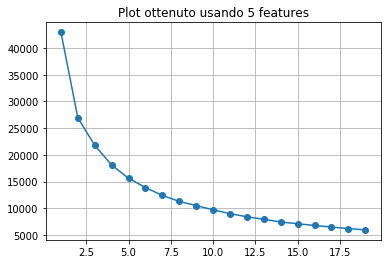

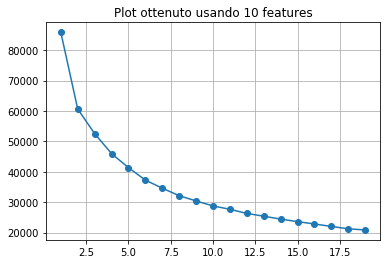

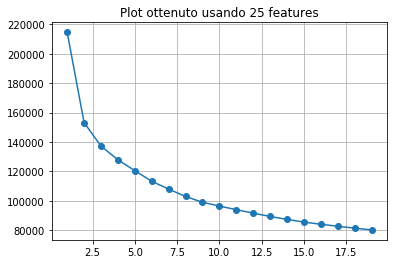

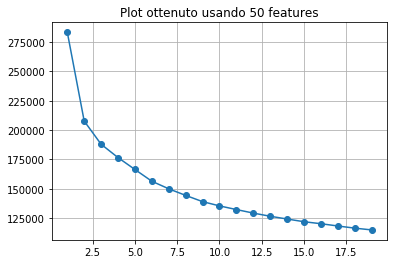

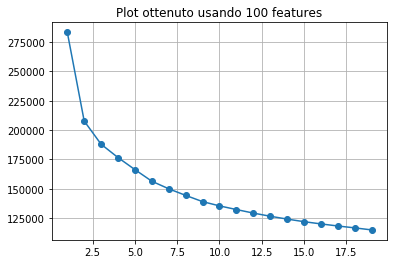

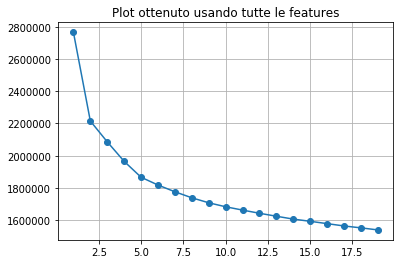

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


xtr_best_5 = xtr.loc[:, list_best_5_feat_imp ]
xtr_best_10 = xtr.loc[:, list_best_10_feat_imp ]
xtr_best_25 = xtr.loc[:, list_best_25_feat_imp ]
xtr_best_50 = xtr.loc[:, list_best_50_feat_imp ]
xtr_best_100 = xtr.loc[:, list_best_100_feat_imp ]

scaler = StandardScaler()
xtr_SC = scaler.fit_transform( xtr )
xtr_best_5_SC = scaler.fit_transform( xtr_best_5 )
xtr_best_10_SC = scaler.fit_transform( xtr_best_10 )
xtr_best_25_SC = scaler.fit_transform( xtr_best_25 )
xtr_best_50_SC = scaler.fit_transform( xtr_best_50 )
xtr_best_100_SC = scaler.fit_transform( xtr_best_100 )


inertias_5best = []
n_clusters_5best = []
for v in list( range(1, 20 ) ):
    km = KMeans( n_clusters=v).fit( xtr_best_5_SC )
    n_clusters_5best.append( v )
    inertias_5best.append( km.inertia_ )
plt.plot( n_clusters_5best, inertias_5best,'-o' )
plt.title("Plot ottenuto usando 5 features")
plt.grid()
plt.show()

inertias_10best = []
n_clusters_10best = []
for v in list( range(1, 20 ) ):
    km = KMeans( n_clusters=v).fit( xtr_best_10_SC )
    n_clusters_10best.append( v )
    inertias_10best.append( km.inertia_ )
plt.plot( n_clusters_10best, inertias_10best, '-o' )
plt.title("Plot ottenuto usando 10 features")
plt.grid()
plt.show()

inertias_25best = []
n_clusters_25best = []
for v in list( range(1, 20 ) ):
    km = KMeans( n_clusters=v).fit( xtr_best_25_SC )
    n_clusters_25best.append( v )
    inertias_25best.append( km.inertia_ )
plt.plot( n_clusters_25best, inertias_25best, '-o' )
plt.title("Plot ottenuto usando 25 features")
plt.grid()
plt.show()

inertias_50best = []
n_clusters_50best = []
for v in list( range(1, 20 ) ):
    km = KMeans( n_clusters=v).fit( xtr_best_50_SC )
    n_clusters_50best.append( v )
    inertias_50best.append( km.inertia_ )
plt.plot( n_clusters_50best, inertias_50best,'-o' )
plt.title("Plot ottenuto usando 50 features")
plt.grid()
plt.show()

inertias_100best = []
n_clusters_100best = []
for v in list( range(1, 20 ) ):
    km = KMeans( n_clusters=v).fit( xtr_best_100_SC )
    n_clusters_100best.append( v )
    inertias_100best.append( km.inertia_ )
plt.plot( n_clusters_100best, inertias_100best, '-o' )
plt.title("Plot ottenuto usando 100 features")
plt.grid()
plt.show()

inertias_all = []
n_clusters_all = []
for v in list( range(1, 20 ) ):
    km = KMeans( n_clusters=v).fit( xtr_SC )
    n_clusters_all.append( v )
    inertias_all.append( km.inertia_ )
plt.plot( n_clusters_all, inertias_all, '-o' )
plt.title("Plot ottenuto usando tutte le features")
plt.grid()
plt.show()



    
    

In [30]:
xte_best_5 = xte.loc[:, list_best_5_feat_imp ]
xte_best_10 = xte.loc[:, list_best_10_feat_imp ]
xte_best_25 = xte.loc[:, list_best_25_feat_imp ]
xte_best_50 = xte.loc[:, list_best_50_feat_imp ]
xte_best_100 = xte.loc[:, list_best_100_feat_imp]

scaler = StandardScaler()
xte_SC = scaler.fit_transform( xte )
xte_best_5_SC = scaler.fit_transform( xte_best_5 )
xte_best_10_SC = scaler.fit_transform( xte_best_10 )
xte_best_25_SC = scaler.fit_transform( xte_best_25 )
xte_best_50_SC = scaler.fit_transform( xte_best_50 )
xte_best_100_SC = scaler.fit_transform( xte_best_100 )


kms_5 = KMeans( n_clusters=5 ).fit( xtr_best_5_SC )
km_5_Tr = list( kms_5.labels_ )
km_5_Te = list( kms_5.predict( xte_best_5_SC ) )

kms_10 = KMeans( n_clusters=10 ).fit( xtr_best_5_SC )
km_10_Tr = list( kms_10.labels_ )
km_10_Te = list( kms_10.predict( xte_best_5_SC ) )

kms_15 = KMeans( n_clusters=15 ).fit( xtr_best_5_SC )
km_15_Tr = list( kms_15.labels_ )
km_15_Te = list( kms_15.predict( xte_best_5_SC ) )

kms_20 = KMeans( n_clusters=20 ).fit( xtr_best_5_SC )
km_20_Tr = list( kms_20.labels_ )
km_20_Te = list( kms_20.predict( xte_best_5_SC ) )

print( len( km_15_Tr ) )
print( len( km_15_Te ) )


8589
3681


In [31]:
kms_5_all = KMeans( n_clusters=5 ).fit( xtr_SC )
km_5_Tr_all = list( kms_5_all.labels_ )
km_5_Te_all = list( kms_5_all.predict( xte_SC ) )

kms_10_all = KMeans( n_clusters=10 ).fit( xtr_SC )
km_10_Tr_all = list( kms_10_all.labels_ )
km_10_Te_all = list( kms_10_all.predict( xte_SC ) )

kms_15_all = KMeans( n_clusters=15 ).fit( xtr_SC )
km_15_Tr_all = list( kms_15_all.labels_ )
km_15_Te_all = list( kms_15_all.predict( xte_SC ) )

kms_20_all = KMeans( n_clusters=20 ).fit( xtr_SC )
km_20_Tr_all = list( kms_20_all.labels_ )
km_20_Te_all = list( kms_20_all.predict( xte_SC ) )

print( len( km_15_Tr_all ) )
print( len( km_15_Te_all ) )

8589
3681


In [32]:

conto_zeri_top_5_Tr = []
for r in list( range( 0, len( ytr ) ) ):
    conto = 0
    for idx,v in enumerate ( xtr_best_5.iloc[r,:] ):
        if v==0:
            conto = conto+1
    conto_zeri_top_5_Tr.append( conto )

conto_zeri_top_10_Tr = []
for r in list( range( 0, len( ytr ) ) ):
    conto = 0
    for idx,v in enumerate ( xtr_best_10.iloc[r,:] ):
        if v==0:
            conto = conto+1
    conto_zeri_top_10_Tr.append( conto )


conto_zeri_top_25_Tr = []
for r in list( range( 0, len( ytr ) ) ):
    conto = 0
    for idx,v in enumerate ( xtr_best_25.iloc[r,:] ):
        if v==0:
            conto = conto+1
    conto_zeri_top_25_Tr.append( conto )
    
conto_zeri_top_50_Tr = []
for r in list( range( 0, len( ytr ) ) ):
    conto = 0
    for idx,v in enumerate ( xtr_best_50.iloc[r,:] ):
        if v==0:
            conto = conto+1
    conto_zeri_top_50_Tr.append( conto )
    
conto_zeri_top_100_Tr = []
for r in list( range( 0, len( ytr ) ) ):
    conto = 0
    for idx,v in enumerate ( xtr_best_100.iloc[r,:] ):
        if v==0:
            conto = conto+1
    conto_zeri_top_100_Tr.append( conto )

for idx, v in enumerate ( conto_zeri_top_10_Tr ):
    print( conto_zeri_top_5_Tr[idx], v, conto_zeri_top_25_Tr[idx], conto_zeri_top_50_Tr[idx], conto_zeri_top_100_Tr[idx] )


2 4 5 6 6
2 4 8 10 10
2 3 4 6 6
2 4 7 9 9
2 4 8 11 11
1 5 11 13 13
2 3 3 5 5
1 2 3 4 4
1 2 3 4 4
2 4 7 8 8
2 4 6 7 7
0 0 2 3 3
0 0 0 0 0
2 4 8 10 10
2 4 7 9 9
2 4 6 7 7
0 0 0 1 1
0 1 2 2 2
2 4 9 11 11
0 1 1 1 1
1 3 3 3 3
2 4 7 8 8
1 2 8 9 9
2 4 8 11 11
0 1 4 6 6
2 5 13 16 16
0 1 3 4 4
0 1 6 9 9
0 2 4 5 5
2 4 7 9 9
3 5 12 16 16
0 1 2 2 2
3 5 11 14 14
2 5 8 10 10
0 0 1 1 1
0 1 1 2 2
0 0 0 0 0
0 0 2 2 2
0 0 3 6 6
0 2 3 4 4
0 1 4 5 5
2 5 9 12 12
0 0 0 0 0
0 0 0 1 1
2 3 4 5 5
0 1 1 1 1
2 7 16 22 22
2 4 5 6 6
2 6 17 22 22
2 4 5 7 7
2 7 15 18 18
1 1 7 10 10
0 0 3 5 5
1 3 3 3 3
0 0 0 0 0
2 4 7 9 9
1 2 6 8 8
0 1 2 2 2
2 7 14 17 17
2 4 5 6 6
2 4 6 8 8
0 1 1 1 1
1 1 3 4 4
0 0 0 0 0
0 1 5 7 7
0 2 3 4 4
2 4 5 6 6
2 4 8 10 10
2 4 6 7 7
1 3 4 5 5
2 3 3 4 4
2 5 15 19 19
2 4 4 6 6
1 6 10 12 12
0 0 3 5 5
2 4 10 12 12
2 4 14 17 17
1 4 4 4 4
1 3 5 7 7
0 0 0 0 0
2 4 5 6 6
1 3 3 4 4
2 4 7 8 8
0 1 1 1 1
2 4 4 5 5
2 4 10 15 15
1 3 3 3 3
1 4 6 7 7
0 0 0 0 0
2 4 12 14 14
1 3 4 5 5
1 4 6 8 8
1 2 2 2 2
1 4 9 11 1

1 1 6 7 7
0 0 0 1 1
2 5 9 13 13
3 5 12 15 15
2 5 6 7 7
0 0 0 0 0
2 4 7 10 10
0 2 7 10 10
3 4 6 8 8
1 1 2 3 3
0 0 1 2 2
2 5 12 14 14
1 2 8 9 9
2 4 10 13 13
1 3 4 5 5
0 0 0 0 0
3 5 11 14 14
0 0 0 0 0
2 4 5 7 7
0 1 5 7 7
2 4 5 6 6
0 1 2 2 2
2 5 15 18 18
0 0 1 1 1
0 1 5 7 7
0 0 0 0 0
0 0 5 6 6
0 1 5 7 7
1 3 3 4 4
1 3 3 3 3
0 0 0 0 0
0 1 4 5 5
1 3 3 3 3
0 0 0 0 0
0 1 1 1 1
1 4 7 8 8
1 3 3 3 3
1 3 9 12 12
1 3 3 4 4
0 0 4 6 6
1 1 6 8 8
0 1 1 2 2
0 1 1 1 1
0 1 1 2 2
2 3 4 7 7
2 4 10 15 15
1 3 4 4 4
0 0 0 0 0
0 1 3 4 4
2 7 19 24 24
2 4 6 7 7
2 4 11 15 15
1 2 7 9 9
2 6 15 19 19
0 0 12 15 15
0 1 3 4 4
1 3 3 3 3
2 6 8 10 10
0 0 0 0 0
2 4 15 20 20
2 4 5 6 6
3 6 12 14 14
2 4 5 6 6
1 1 7 9 9
2 4 7 9 9
0 0 3 4 4
1 3 8 9 9
0 1 1 1 1
2 5 9 11 11
2 4 6 7 7
2 6 9 11 11
2 6 13 16 16
2 4 6 8 8
4 8 22 30 30
0 0 1 2 2
2 4 5 7 7
1 3 4 4 4
2 4 6 7 7
0 1 2 2 2
1 3 5 6 6
1 3 3 3 3
2 6 9 11 11
1 3 3 3 3
3 5 12 16 16
1 4 5 6 6
2 4 6 8 8
2 4 6 7 7
0 0 0 0 0
1 2 5 5 5
2 4 6 8 8
0 0 1 1 1
2 5 11 15 15
0 0 0 0 0
0 1 2 

2 4 6 7 7
1 2 4 4 4
2 4 5 6 6
0 0 1 1 1
1 3 5 5 5
1 3 4 4 4
0 0 4 5 5
0 0 0 0 0
2 4 8 10 10
0 0 0 0 0
1 3 4 4 4
1 5 7 7 7
0 0 0 0 0
2 5 18 23 23
2 4 5 6 6
0 0 0 0 0
0 0 0 0 0
1 6 8 11 11
2 4 5 6 6
1 1 7 11 11
0 0 4 5 5
0 2 9 11 11
2 4 11 14 14
1 1 2 3 3
2 4 9 12 12
1 4 4 4 4
3 6 19 25 25
0 0 0 1 1
3 8 18 22 22
0 1 2 4 4
0 0 2 4 4
4 9 24 31 31
0 1 2 3 3
2 4 7 8 8
2 4 5 6 6
0 0 1 1 1
2 4 6 7 7
2 5 11 14 14
0 1 8 9 9
0 0 0 0 0
0 0 0 0 0
2 4 5 6 6
0 1 1 1 1
1 2 3 4 4
0 0 0 0 0
1 4 9 11 11
1 5 6 7 7
1 2 8 10 10
1 2 2 2 2
0 1 3 4 4
3 5 13 17 17
2 3 3 4 4
2 5 16 21 21
2 4 9 11 11
2 4 7 8 8
2 4 12 17 17
2 4 6 7 7
1 3 5 5 5
0 0 5 7 7
1 3 5 6 6
2 4 6 7 7
1 4 8 10 10
0 1 2 2 2
2 4 5 6 6
2 5 7 9 9
0 0 0 0 0
1 2 2 2 2
0 1 2 2 2
1 2 2 2 2
2 5 8 11 11
2 4 7 10 10
1 3 4 5 5
0 0 4 7 7
1 1 6 8 8
2 4 7 9 9
1 3 4 4 4
2 5 12 15 15
0 0 1 1 1
1 4 6 7 7
1 2 3 3 3
2 4 6 7 7
0 0 0 0 0
3 5 10 13 13
0 0 1 1 1
0 0 4 6 6
2 4 11 14 14
2 3 3 4 4
1 2 8 11 11
2 3 14 19 19
2 4 6 7 7
2 4 5 6 6
0 1 3 3 3
0 0 0 0 0
0 0 2 3

2 6 8 9 9
1 3 3 3 3
2 4 5 6 6
2 6 7 8 8
0 1 11 14 14
2 4 5 6 6
2 4 8 10 10
2 4 5 6 6
0 0 0 0 0
3 5 12 15 15
2 4 7 10 10
0 0 0 1 1
0 1 3 3 3
2 5 7 9 9
2 3 7 9 9
0 2 9 11 11
2 5 6 8 8
2 5 11 13 13
2 4 6 7 7
1 6 7 8 8
2 4 4 6 6
2 4 5 7 7
0 0 0 0 0
0 0 0 1 1
0 2 3 3 3
1 3 3 3 3
0 1 6 8 8
2 4 5 7 7
2 4 6 8 8
0 0 1 1 1
2 4 4 5 5
0 0 0 0 0
2 4 9 11 11
0 0 1 1 1
0 1 3 5 5
0 2 4 5 5
0 1 3 4 4
0 0 1 1 1
2 4 5 6 6
0 0 0 0 0
3 6 11 13 13
2 4 5 7 7
1 2 3 3 3
0 1 1 1 1
3 8 22 29 29
1 3 3 3 3
0 0 1 1 1
2 3 3 4 4
0 1 1 2 2
0 0 0 0 0
2 4 6 7 7
0 0 0 0 0
2 3 8 11 11
2 4 7 10 10
0 0 0 1 1
1 3 4 5 5
1 3 3 3 3
1 3 6 8 8
2 4 5 6 6
0 0 0 0 0
0 1 2 2 2
0 0 2 3 3
0 0 0 0 0
2 4 6 8 8
1 3 5 5 5
0 0 2 2 2
1 3 3 3 3
2 4 10 13 13
2 4 5 6 6
2 4 9 11 11
0 0 2 3 3
0 2 3 3 3
1 3 3 4 4
0 0 0 0 0
1 3 6 8 8
1 2 5 7 7
0 1 5 8 8
2 4 6 8 8
0 0 2 3 3
2 4 5 7 7
2 4 5 6 6
1 3 5 5 5
2 4 5 6 6
0 2 3 4 4
2 4 9 11 11
2 6 14 18 18
2 5 9 10 10
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
2 4 8 9 9
0 0 0 0 0
1 3 3 3 3
2 5 7 10 10
1 4 6 7 7
2 5 6 7 7

0 0 4 5 5
1 3 4 5 5
2 4 5 6 6
4 9 24 32 32
2 5 11 14 14
1 1 2 3 3
2 4 5 6 6
2 4 5 6 6
0 0 2 2 2
0 0 1 2 2
0 0 0 1 1
0 2 8 10 10
2 5 8 10 10
1 3 4 4 4
0 0 5 6 6
2 5 6 7 7
2 5 7 9 9
1 2 7 9 9
2 4 5 6 6
3 6 13 17 17
1 3 7 10 10
0 0 3 4 4
3 6 14 17 17
2 4 8 11 11
0 0 1 1 1
1 5 11 15 15
1 4 4 4 4
0 0 0 0 0
1 1 2 4 4
2 4 6 7 7
0 0 0 0 0
1 4 4 4 4
0 0 2 2 2
2 5 6 7 7
0 0 0 0 0
2 4 6 8 8
1 3 4 4 4
2 4 6 7 7
0 0 0 0 0
2 4 7 8 8
0 0 0 0 0
0 2 6 6 6
1 3 3 3 3
1 2 4 4 4
2 5 10 13 13
1 2 8 10 10
0 0 0 1 1
2 4 5 6 6
1 2 5 6 6
1 1 3 5 5
0 0 0 1 1
0 0 0 1 1
2 3 4 5 5
0 2 4 5 5
0 0 0 0 0
2 4 5 6 6
0 0 4 6 6
1 3 5 6 6
2 6 14 16 16
0 1 2 2 2
0 0 0 0 0
1 3 3 3 3
1 2 9 12 12
2 4 5 6 6
3 5 12 15 15
0 0 1 1 1
2 4 7 10 10
2 4 8 10 10
1 1 10 14 14
0 0 1 1 1
0 1 7 8 8
0 0 5 6 6
2 3 4 6 6
2 5 5 6 6
0 0 1 1 1
0 0 0 0 0
0 0 1 1 1
1 3 4 4 4
1 5 6 6 6
0 0 0 0 0
2 5 7 8 8
0 0 0 1 1
0 0 4 4 4
2 5 7 8 8
0 2 5 6 6
1 3 4 4 4
2 7 18 23 23
0 0 3 4 4
2 4 4 5 5
2 7 12 13 13
0 1 5 6 6
1 2 4 5 5
0 3 9 12 12
0 0 0 1 1
0 3 11 13

1 3 7 7 7
2 4 5 6 6
2 5 6 7 7
0 0 1 1 1
4 9 20 28 28
2 4 7 10 10
0 0 0 0 0
0 0 5 6 6
2 4 5 6 6
0 1 3 3 3
1 3 3 3 3
0 0 0 0 0
2 4 10 12 12
0 0 4 5 5
1 3 5 5 5
2 5 7 8 8
2 4 6 7 7
2 4 6 9 9
0 1 3 4 4
1 3 3 3 3
3 5 12 16 16
2 5 14 19 19
1 3 7 7 7
2 6 8 9 9
0 2 4 5 5
1 2 4 6 6
2 3 5 7 7
0 1 1 1 1
2 5 6 7 7
2 5 11 15 15
2 7 19 24 24
0 0 2 2 2
2 4 8 10 10
1 3 8 9 9
4 9 23 30 30
2 4 6 7 7
0 0 0 0 0
2 5 17 22 22
3 7 19 24 24
1 3 14 19 19
2 4 5 6 6
0 2 5 6 6
5 10 25 33 33
2 4 5 6 6
1 3 5 5 5
3 5 11 14 14
1 3 3 3 3
1 3 9 10 10
1 1 2 3 3
2 6 15 20 20
2 4 5 6 6
2 4 6 8 8
3 5 12 15 15
0 0 1 1 1
0 1 1 1 1
0 1 2 3 3
2 4 5 6 6
0 0 2 2 2
1 2 2 2 2
1 4 8 9 9
0 0 1 2 2
2 4 9 10 10
0 1 3 4 4
2 5 13 16 16
1 3 4 4 4
3 5 14 19 19
2 5 10 12 12
0 0 1 1 1
2 4 9 11 11
0 0 1 1 1
0 1 6 8 8
2 6 10 12 12
0 0 5 6 6
2 5 10 12 12
2 4 5 6 6
2 4 5 6 6
0 1 3 3 3
0 0 2 2 2
2 4 5 6 6
2 6 8 10 10
2 4 5 6 6
0 0 4 6 6
0 1 1 2 2
1 4 12 15 15
1 2 9 11 11
2 6 13 16 16
0 0 1 1 1
1 3 3 3 3
2 4 5 6 6
2 4 6 7 7
0 0 0 0 0
2 5 11 14 14

0 0 0 0 0
2 5 8 9 9
0 1 2 3 3
2 5 6 8 8
2 5 8 11 11
0 0 0 0 0
1 3 5 5 5
0 0 1 1 1
1 3 3 3 3
2 5 7 8 8
0 1 5 8 8
1 3 3 3 3
0 0 1 1 1
2 4 5 6 6
0 1 3 3 3
0 0 0 0 0
1 4 13 18 18
1 3 6 7 7
0 1 2 2 2
0 0 6 8 8
0 0 1 2 2
2 4 5 6 6
0 1 2 2 2
0 0 0 0 0
3 5 12 15 15
2 4 10 12 12
1 4 4 4 4
2 4 8 10 10
0 2 3 4 4
1 3 3 3 3
0 1 7 8 8
2 4 6 9 9
2 4 5 6 6
0 0 4 7 7
1 1 7 11 11
0 0 0 0 0
0 0 0 1 1
1 2 8 11 11
0 0 0 0 0
2 6 7 8 8
1 3 3 3 3
2 4 4 6 6
1 2 2 3 3
2 4 6 8 8
1 2 7 9 9
3 5 12 16 16
2 5 9 13 13
0 0 0 0 0
1 1 3 4 4
2 5 9 10 10
2 7 11 14 14
1 5 7 8 8
0 1 2 2 2
2 5 10 12 12
0 0 1 1 1
0 0 0 0 0
1 2 9 11 11
2 3 3 4 4
2 4 5 6 6
0 0 1 1 1
2 4 11 14 14
1 1 5 6 6
2 4 12 16 16
2 4 5 6 6
2 5 6 9 9
0 0 0 0 0
0 1 2 2 2
0 0 0 0 0
0 1 1 1 1
2 4 8 11 11
3 5 12 15 15
2 5 11 14 14
0 0 0 0 0
0 1 5 7 7
2 4 7 8 8
0 0 0 0 0
1 1 6 8 8
0 1 1 1 1
2 4 6 8 8
2 3 4 5 5
2 4 8 10 10
2 4 6 7 7
1 1 7 9 9
1 2 4 4 4
1 2 2 2 2
0 0 2 3 3
2 4 6 7 7
1 3 3 4 4
0 1 10 14 14
0 0 0 0 0
0 0 3 4 4
2 5 9 11 11
3 6 15 19 19
1 3 3 3 3
1 3 

1 3 3 3 3
2 4 6 7 7
2 4 5 6 6
2 3 5 6 6
1 4 7 8 8
0 0 2 2 2
0 0 0 0 0
2 4 6 8 8
0 1 2 2 2
0 1 3 3 3
2 4 11 13 13
1 3 3 3 3
2 4 5 6 6
2 4 5 6 6
1 3 7 9 9
0 1 4 7 7
0 0 1 1 1
3 5 12 15 15
1 3 3 3 3
2 4 10 12 12
0 0 0 0 0
2 4 6 7 7
0 0 2 3 3
1 3 6 8 8
3 5 11 14 14
2 3 3 4 4
2 4 11 14 14
0 0 1 2 2
0 1 2 2 2
0 0 0 0 0
2 4 5 7 7
2 5 9 12 12
2 5 8 10 10
0 0 3 5 5
0 0 0 0 0
0 0 0 0 0
2 5 7 8 8
2 4 5 7 7
0 1 8 10 10
2 4 5 6 6
2 4 6 7 7
2 3 4 5 5
1 4 7 9 9
0 0 0 0 0
2 4 8 11 11
2 4 10 12 12
2 4 4 5 5
2 5 11 16 16
0 1 1 1 1
2 4 8 11 11
2 4 5 6 6
0 0 0 0 0
2 5 6 7 7
0 0 0 0 0
1 3 6 7 7
1 2 4 4 4
2 3 3 4 4
2 4 6 7 7
0 0 0 0 0
0 0 0 0 0
1 3 5 5 5
2 4 7 9 9
2 5 7 10 10
1 1 2 3 3
2 4 6 7 7
0 0 0 0 0
3 6 15 20 20
2 4 6 7 7
2 6 7 9 9
1 1 6 7 7
0 0 4 5 5
2 4 8 11 11
2 4 8 10 10
2 4 5 6 6
3 6 15 19 19
1 3 3 4 4
2 6 18 22 22
2 5 12 15 15
2 5 14 18 18
2 4 5 6 6
2 5 9 11 11
0 1 2 2 2
1 3 3 3 3
0 0 1 3 3
0 0 0 0 0
2 4 9 11 11
0 0 0 1 1
0 0 1 2 2
0 2 11 14 14
2 4 11 16 16
3 5 12 16 16
0 0 1 1 1
2 4 8 11 11
0 0

2 4 5 6 6
0 1 2 3 3
1 3 7 10 10
0 1 2 3 3
1 1 2 3 3
2 4 7 10 10
1 1 8 10 10
0 0 1 2 2
0 1 7 8 8
0 0 2 2 2
1 4 17 21 21
0 0 1 2 2
0 1 4 5 5
2 3 3 5 5
1 3 6 6 6
1 3 14 18 18
2 4 5 6 6
1 4 4 4 4
2 4 5 6 6
1 2 2 2 2
0 1 1 1 1
2 6 9 13 13
0 0 2 2 2
1 2 7 8 8
0 0 4 5 5
0 2 10 12 12
1 1 6 7 7
1 4 5 7 7
1 2 8 10 10
2 4 10 12 12
3 5 14 19 19
1 3 4 6 6
0 1 1 1 1
1 1 3 5 5
2 4 5 6 6
1 5 7 9 9
2 4 8 9 9
1 1 2 3 3
2 4 8 10 10
0 0 0 0 0
2 4 6 7 7
1 2 2 2 2
1 3 5 6 6
2 5 7 10 10
3 7 16 20 20
2 4 6 7 7
2 5 13 16 16
2 4 7 9 9
1 3 4 5 5
0 0 0 0 0
0 1 2 2 2
2 4 6 8 8
0 0 0 0 0
1 2 2 2 2
2 4 5 6 6
1 3 7 8 8
1 3 5 5 5
2 4 9 11 11
0 0 1 1 1
2 5 8 10 10
0 0 2 2 2
0 0 0 0 0
1 3 5 6 6
2 3 6 9 9
2 5 6 7 7
1 1 3 4 4
0 1 3 3 3
0 2 2 3 3
2 4 5 6 6
2 4 9 11 11
2 4 5 6 6
0 0 1 1 1
1 2 4 8 8
2 5 13 17 17
2 7 11 14 14
1 3 8 9 9
2 4 5 7 7
2 7 17 22 22
1 3 3 3 3
0 0 3 4 4
2 4 6 7 7
2 4 10 12 12
0 1 1 1 1
3 7 17 23 23
2 4 5 6 6
2 4 5 6 6
1 2 2 2 2
1 3 5 6 6
2 6 9 11 11
1 2 8 10 10
1 3 5 5 5
1 3 10 13 13
0 0 0 1 1
1 3 3 3

In [33]:
conto_diffs_posneg_top_5_Tr = []
for r in list( range( 0, len( ytr ) ) ):
    conto_pos = 0
    conto_neg = 0
    for idx,v in enumerate ( xtr_best_5.iloc[r,:] ):
        if v>0:
            conto_pos = conto_pos+1
        elif v<0:
            conto_neg = conto_neg+1
    conto_diffs_posneg_top_5_Tr.append( conto_pos-conto_neg )
    
    
conto_diffs_posneg_top_10_Tr = []
for r in list( range( 0, len( ytr ) ) ):
    conto_pos = 0
    conto_neg = 0
    for idx,v in enumerate ( xtr_best_10.iloc[r,:] ):
        if v>0:
            conto_pos = conto_pos+1
        elif v<0:
            conto_neg = conto_neg+1
    conto_diffs_posneg_top_10_Tr.append( conto_pos-conto_neg )


conto_diffs_posneg_top_25_Tr = []
for r in list( range( 0, len( ytr ) ) ):
    conto_pos = 0
    conto_neg = 0
    for idx,v in enumerate ( xtr_best_25.iloc[r,:] ):
        if v>0:
            conto_pos = conto_pos+1
        elif v<0:
            conto_neg = conto_neg+1
    conto_diffs_posneg_top_25_Tr.append( conto_pos-conto_neg )


conto_diffs_posneg_top_50_Tr = []
for r in list( range( 0, len( ytr ) ) ):
    conto_pos = 0
    conto_neg = 0
    for idx,v in enumerate ( xtr_best_50.iloc[r,:] ):
        if v>0:
            conto_pos = conto_pos+1
        elif v<0:
            conto_neg = conto_neg+1
    conto_diffs_posneg_top_50_Tr.append( conto_pos-conto_neg )
    
conto_diffs_posneg_top_100_Tr = []
for r in list( range( 0, len( ytr ) ) ):
    conto_pos = 0
    conto_neg = 0
    for idx,v in enumerate ( xtr_best_100.iloc[r,:] ):
        if v>0:
            conto_pos = conto_pos+1
        elif v<0:
            conto_neg = conto_neg+1
    conto_diffs_posneg_top_100_Tr.append( conto_pos-conto_neg )




for idx, v in enumerate ( conto_diffs_posneg_top_10_Tr ):
    print( conto_diffs_posneg_top_5_Tr[idx], v, conto_diffs_posneg_top_25_Tr[idx],
          conto_diffs_posneg_top_50_Tr[idx], conto_diffs_posneg_top_100_Tr[idx] )

-1 0 8 9 9
-1 -4 3 1 1
1 -3 5 9 9
-1 0 8 12 12
3 2 13 18 18
2 3 10 14 14
3 3 18 22 22
4 6 18 19 19
-2 -4 4 5 5
3 4 14 19 19
-1 0 7 8 8
1 0 5 4 4
1 2 13 17 17
-1 2 11 13 13
-1 0 6 6 6
-1 -4 5 6 6
-1 -2 7 10 10
1 1 13 19 19
3 2 10 14 14
1 1 12 18 18
0 1 8 10 10
-1 -4 2 3 3
2 2 9 14 14
-1 0 7 6 6
-1 -1 9 9 9
3 1 6 9 9
1 1 10 11 11
-1 -1 7 6 6
-3 -4 5 8 8
3 2 12 16 16
-2 -1 1 1 1
1 -3 3 3 3
-2 -1 2 1 1
1 -1 7 9 9
3 4 14 18 18
1 1 10 11 11
1 0 7 7 7
1 6 19 27 27
1 2 12 15 15
-1 -2 8 9 9
3 3 11 14 14
3 3 14 19 19
1 0 7 7 7
1 2 9 10 10
3 3 17 22 22
-1 -3 8 10 10
1 1 5 5 5
-1 0 8 9 9
3 4 8 11 11
1 0 12 16 16
3 3 10 13 13
0 -1 2 1 1
5 6 16 18 18
4 3 14 18 18
-1 0 11 13 13
3 0 12 18 18
2 2 11 15 15
5 7 17 19 19
1 1 9 10 10
-1 0 8 9 9
-1 0 5 5 5
-3 -5 2 2 2
0 1 8 9 9
1 0 7 9 9
1 1 8 12 12
-3 -4 4 7 7
-1 -4 2 3 3
1 0 7 9 9
3 0 9 10 10
2 1 11 16 16
3 3 14 19 19
3 1 6 8 8
3 2 13 17 17
4 4 15 19 19
1 2 12 14 14
-1 0 5 5 5
-3 -6 -5 -6 -6
-2 -4 1 1 1
0 -1 10 14 14
5 6 13 17 17
-1 0 8 11 11
0 1 8 11 11


-3 -2 7 11 11
-2 0 9 11 11
-2 -1 1 1 1
1 -1 10 15 15
1 2 9 14 14
3 2 14 19 19
0 0 4 5 5
-3 -4 2 3 3
1 1 13 19 19
1 1 9 12 12
2 1 14 20 20
1 2 7 7 7
4 3 10 11 11
5 6 17 19 19
-2 -1 3 5 5
0 0 0 0 0
2 1 11 13 13
1 4 17 24 24
2 1 11 16 16
3 2 14 17 17
2 1 14 20 20
-1 1 9 13 13
-3 -4 7 11 11
0 -5 2 4 4
-1 -1 7 6 6
0 1 8 8 8
-3 -4 6 8 8
-1 -1 9 11 11
3 1 7 10 10
2 5 20 28 28
2 2 9 13 13
1 0 10 13 13
5 4 13 17 17
3 2 10 15 15
1 0 7 7 7
3 5 9 10 10
2 2 8 9 9
1 0 7 6 6
-3 0 10 10 10
1 0 4 2 2
-2 0 8 8 8
3 2 12 16 16
-2 0 4 3 3
-1 -3 4 6 6
-2 -4 0 0 0
1 2 8 9 9
-1 -1 4 3 3
3 2 14 19 19
-1 -1 3 1 1
3 2 13 18 18
2 1 10 12 12
-3 -2 5 5 5
0 1 8 10 10
3 4 13 18 18
5 6 17 17 17
-1 0 7 9 9
-1 1 12 13 13
1 2 13 15 15
1 0 6 7 7
-1 0 8 11 11
1 0 10 15 15
1 3 12 13 13
2 2 15 20 20
2 2 12 18 18
1 -3 4 2 2
1 1 10 10 10
2 1 10 15 15
3 2 9 13 13
2 0 5 9 9
1 1 8 13 13
0 1 8 10 10
-1 0 7 11 11
1 0 5 3 3
1 2 15 19 19
1 0 3 0 0
3 2 14 16 16
1 0 7 9 9
3 0 7 9 9
-2 -1 7 11 11
5 3 14 17 17
-3 0 5 8 8
1 2 15 19 19
2 0

1 -1 3 -1 -1
-1 0 8 11 11
0 -2 8 7 7
-2 0 5 4 4
5 2 15 21 21
-1 4 15 19 19
3 4 8 10 10
0 1 9 9 9
-2 -3 7 9 9
-1 0 3 1 1
-3 0 9 13 13
5 6 19 25 25
1 1 13 17 17
-1 1 6 5 5
1 1 9 14 14
2 6 18 23 23
3 5 11 11 11
3 2 7 10 10
5 6 15 19 19
3 2 12 15 15
1 1 6 11 11
-3 0 7 9 9
-1 0 6 6 6
2 1 9 13 13
2 2 15 21 21
1 2 9 11 11
2 1 14 20 20
-1 -2 2 2 2
2 1 10 12 12
3 2 10 15 15
5 6 19 25 25
1 1 9 10 10
1 0 3 1 1
-1 1 6 4 4
3 1 14 19 19
5 6 17 19 19
-1 0 3 1 1
0 0 3 1 1
0 1 8 10 10
3 2 14 17 17
-3 -3 5 8 8
3 1 9 15 15
1 -1 12 16 16
1 -4 1 1 1
1 2 11 13 13
2 1 10 13 13
1 1 11 17 17
1 0 9 13 13
3 2 13 17 17
1 2 11 16 16
-3 0 8 14 14
4 5 14 17 17
0 -2 4 6 6
1 2 15 19 19
1 0 3 3 3
2 1 10 13 13
1 2 15 19 19
5 6 17 22 22
1 2 15 19 19
1 1 8 9 9
3 2 9 12 12
-1 -2 6 6 6
1 0 9 11 11
0 -3 6 7 7
-1 0 10 13 13
0 1 6 5 5
-1 0 11 12 12
0 1 7 11 11
3 2 14 17 17
-2 -1 6 7 7
-3 -1 6 8 8
0 1 8 10 10
0 0 3 2 2
-2 -1 7 11 11
-1 -2 5 4 4
0 1 10 12 12
1 2 17 23 23
1 4 12 12 12
2 0 13 18 18
1 0 6 6 6
1 2 12 17 17
1 0 7 9 9

5 4 14 16 16
0 -1 10 11 11
1 2 12 16 16
2 1 13 14 14
1 1 14 18 18
1 -1 9 14 14
3 4 16 23 23
2 0 8 14 14
-1 -4 5 9 9
-1 0 3 4 4
4 6 19 23 23
3 1 7 10 10
1 0 6 5 5
-3 -4 3 5 5
4 7 17 20 20
-1 -4 2 5 5
3 2 11 11 11
3 2 14 17 17
-1 0 7 11 11
1 2 15 18 18
1 1 9 9 9
1 3 10 11 11
1 2 14 20 20
-1 -1 4 5 5
1 2 14 19 19
-1 0 4 6 6
1 4 18 26 26
4 3 13 18 18
-1 0 4 2 2
-2 -1 2 1 1
1 2 10 14 14
3 6 19 24 24
-1 0 3 2 2
1 0 11 14 14
2 2 11 11 11
1 1 10 11 11
3 2 12 15 15
3 4 14 17 17
1 0 13 18 18
3 2 10 12 12
-2 0 7 8 8
-1 0 9 12 12
3 4 12 15 15
-1 0 7 8 8
5 2 8 11 11
1 1 11 13 13
-3 -1 3 2 2
-3 -2 -1 -1 -1
1 2 13 19 19
1 2 11 16 16
3 4 15 17 17
-2 -1 2 2 2
3 2 14 19 19
3 3 7 11 11
-1 -2 5 3 3
2 2 15 21 21
3 2 9 12 12
5 2 11 14 14
1 1 2 2 2
3 2 16 21 21
3 4 15 19 19
1 2 13 16 16
-2 0 5 5 5
5 6 8 10 10
2 0 8 9 9
1 0 5 6 6
3 2 9 12 12
1 1 13 18 18
1 3 15 21 21
5 2 14 19 19
-2 -1 6 10 10
1 2 15 21 21
-2 -3 1 -1 -1
2 3 11 17 17
-1 -2 5 3 3
-2 -1 2 2 2
-3 0 9 11 11
2 3 12 14 14
1 2 12 18 18
-1 0 3 1 1
3 2

3 6 16 20 20
3 1 10 16 16
-1 0 9 11 11
-2 -1 8 8 8
0 0 6 4 4
1 1 10 12 12
1 2 9 13 13
3 6 17 23 23
2 1 14 20 20
3 3 14 16 16
5 0 11 15 15
-1 -1 12 15 15
-1 0 8 10 10
1 0 5 6 6
-3 -1 5 4 4
1 2 12 17 17
3 2 14 18 18
3 2 12 16 16
0 1 10 12 12
1 0 6 6 6
-1 0 5 4 4
5 2 13 17 17
1 0 9 10 10
3 2 8 12 12
2 0 5 9 9
3 2 9 13 13
2 2 15 21 21
1 1 9 14 14
0 3 8 8 8
3 2 12 17 17
-1 -1 2 0 0
5 3 13 18 18
-1 0 3 3 3
-1 -2 5 7 7
0 1 6 4 4
1 0 6 5 5
-3 0 7 9 9
5 6 17 23 23
-1 -2 4 6 6
5 6 15 19 19
-1 0 7 10 10
1 0 8 10 10
2 6 18 24 24
3 2 13 16 16
1 1 6 8 8
-1 0 8 8 8
1 3 13 17 17
1 1 9 14 14
2 1 12 17 17
1 1 9 12 12
1 2 13 16 16
3 0 9 13 13
-1 0 6 8 8
2 1 8 13 13
3 2 10 14 14
-3 -2 5 9 9
-3 0 8 10 10
3 2 10 12 12
2 3 13 18 18
-1 -3 8 9 9
3 1 12 19 19
3 4 13 17 17
0 1 8 8 8
-2 -1 5 6 6
2 2 16 20 20
1 1 12 16 16
1 2 15 21 21
1 0 10 12 12
-3 2 12 14 14
5 2 11 13 13
3 5 18 23 23
-1 -3 6 4 4
1 0 8 12 12
1 1 1 2 2
1 -1 12 14 14
3 1 13 17 17
3 1 9 12 12
3 2 10 13 13
1 1 12 13 13
-2 -1 8 12 12
3 0 11 11 11
-2 

-3 -5 4 8 8
2 0 9 13 13
-2 -4 3 2 2
-1 -2 5 5 5
0 0 7 9 9
5 6 16 19 19
3 1 12 13 13
0 -1 12 14 14
-1 -1 8 8 8
-1 -2 7 11 11
1 1 8 10 10
1 2 15 21 21
-3 0 11 15 15
1 2 15 19 19
0 0 0 0 0
2 0 7 11 11
-2 -5 5 7 7
1 0 9 10 10
-1 -4 2 3 3
1 1 13 17 17
-1 -2 6 9 9
4 7 20 26 26
-2 -3 3 4 4
1 2 15 21 21
3 1 8 12 12
0 1 8 10 10
-1 1 4 2 2
1 0 5 4 4
-1 -3 1 1 1
3 2 13 15 15
1 2 10 15 15
0 0 5 4 4
1 0 7 9 9
1 4 6 5 5
3 2 14 17 17
1 2 15 19 19
0 1 9 9 9
2 5 15 20 20
-1 1 10 13 13
5 2 13 18 18
-1 0 10 12 12
-2 -1 10 13 13
-1 0 10 14 14
-2 -2 2 2 2
-1 0 4 3 3
2 5 16 21 21
3 2 10 16 16
-2 0 4 3 3
-3 -3 5 9 9
-2 -4 1 0 0
1 4 17 20 20
1 4 13 19 19
1 2 14 18 18
1 0 5 6 6
-1 0 10 13 13
1 1 8 13 13
0 0 2 0 0
3 1 10 13 13
5 2 15 17 17
0 0 6 12 12
0 5 16 20 20
-2 -1 3 3 3
-3 -2 6 7 7
3 2 14 17 17
0 1 10 12 12
3 2 16 22 22
-1 3 9 12 12
1 3 14 17 17
3 2 16 20 20
3 3 12 13 13
4 5 16 17 17
1 0 11 17 17
-3 -4 5 7 7
4 4 12 17 17
1 1 8 8 8
3 2 13 17 17
-1 -1 3 3 3
3 4 18 25 25
1 2 10 13 13
-2 0 3 1 1
3 2 10 13 13


1 4 13 19 19
-1 0 10 15 15
0 -3 6 8 8
5 7 18 23 23
3 2 16 21 21
4 3 16 20 20
-2 -4 5 7 7
5 5 13 16 16
4 3 13 13 13
1 2 15 21 21
-2 -3 -4 -4 -4
4 3 16 18 18
-2 -2 -2 -3 -3
1 1 9 8 8
-2 -1 7 11 11
-2 0 4 3 3
3 2 15 18 18
4 3 16 20 20
1 2 15 20 20
1 1 12 16 16
3 5 12 17 17
1 2 10 15 15
1 2 9 10 10
1 2 9 11 11
-3 -5 4 5 5
3 6 19 24 24
1 4 12 15 15
1 0 6 8 8
-1 -2 10 13 13
1 0 7 8 8
3 2 12 12 12
-3 -1 8 11 11
-2 -1 0 -2 -2
1 4 14 21 21
3 2 16 21 21
3 2 9 13 13
1 2 10 13 13
-2 -4 5 7 7
1 4 17 23 23
5 5 17 19 19
2 2 15 19 19
1 -2 9 8 8
-1 -1 4 5 5
4 4 16 19 19
3 6 19 25 25
-2 -1 1 -2 -2
3 5 17 22 22
1 0 7 8 8
-1 0 3 1 1
1 2 15 19 19
2 2 15 21 21
0 -1 1 -1 -1
0 0 4 3 3
2 2 14 18 18
3 2 15 20 20
1 1 14 19 19
-1 0 6 5 5
3 6 15 22 22
4 6 15 20 20
-2 -2 1 1 1
0 -1 2 3 3
-3 -5 1 0 0
0 1 10 12 12
-1 0 7 8 8
0 0 4 2 2
3 3 17 22 22
1 1 8 10 10
-1 -1 11 16 16
2 2 10 15 15
-1 1 10 14 14
1 2 9 14 14
3 3 9 12 12
0 3 11 11 11
1 3 14 16 16
2 5 17 24 24
-1 1 5 8 8
3 6 17 22 22
-1 0 2 2 2
-1 0 8 11 11
1 2 14 

2 1 13 19 19
1 0 6 6 6
2 1 14 18 18
1 2 15 17 17
0 0 3 1 1
-1 -1 1 -2 -2
1 2 15 19 19
-1 -4 3 4 4
2 0 11 13 13
-2 -5 2 4 4
2 1 7 10 10
3 2 7 10 10
1 1 12 16 16
3 2 9 12 12
0 -1 6 6 6
4 3 12 13 13
2 1 11 13 13
4 4 12 15 15
-2 1 14 16 16
3 0 9 11 11
-1 -2 7 8 8
5 6 19 21 21
3 2 10 14 14
-1 -4 3 1 1
-2 -2 2 1 1
1 -2 6 6 6
3 2 10 12 12
1 0 7 9 9
1 2 15 21 21
4 7 18 21 21
-3 1 9 9 9
3 6 20 25 25
1 4 13 19 19
1 0 12 18 18
1 0 8 10 10
0 1 3 1 1
1 2 10 14 14
-2 -1 3 4 4
-1 -2 5 9 9
2 5 18 21 21
-1 0 7 7 7
0 -1 9 10 10
5 6 17 22 22
3 2 16 21 21
1 0 6 7 7
5 2 15 21 21
-1 1 5 4 4
4 3 12 16 16
3 2 11 13 13
3 2 12 16 16
0 -1 0 -2 -2
0 0 8 11 11
5 3 14 20 20
1 -4 2 3 3
0 1 10 12 12
-1 1 11 15 15
-3 0 8 10 10
-1 0 8 9 9
-2 -5 4 6 6
1 -2 9 9 9
-1 -4 2 1 1
-1 -2 4 7 7
3 2 14 19 19
-1 0 2 1 1
1 0 6 5 5
-1 0 13 17 17
1 1 13 19 19
3 2 5 7 7
2 1 12 16 16
1 2 14 20 20
-1 0 7 7 7
-2 0 4 4 4
1 1 14 19 19
0 -2 5 4 4
3 2 11 12 12
1 2 15 21 21
3 3 16 21 21
-2 -1 1 0 0
-1 0 3 1 1
2 1 13 17 17
-1 0 4 3 3
3 2 15 20

1 -4 2 0 0
1 2 13 16 16
0 0 6 5 5
-1 -1 7 10 10
3 3 10 13 13
-3 0 9 11 11
-1 -4 2 1 1
1 1 11 15 15
1 1 9 11 11
-2 0 8 11 11
-1 0 9 12 12
1 2 13 17 17
3 1 13 18 18
1 5 17 21 21
1 0 12 17 17
0 -1 2 1 1
2 3 12 16 16
1 4 11 11 11
-2 -4 3 8 8
3 2 12 17 17
1 -1 8 10 10
-3 -1 8 12 12
1 1 8 11 11
2 -1 9 13 13
1 3 8 13 13
1 -2 5 5 5
-1 -4 2 2 2
1 0 8 10 10
-1 -1 10 11 11
0 1 11 13 13
-2 0 9 10 10
1 1 11 14 14
-1 -4 3 5 5
1 1 10 12 12
4 3 15 15 15
-1 0 7 9 9
3 1 6 10 10
-2 -1 7 9 9
-1 0 7 11 11
-3 -5 2 4 4
5 2 11 14 14
4 3 15 19 19
-3 -4 3 5 5
-1 0 7 8 8
5 6 16 19 19
3 2 14 17 17
1 1 14 18 18
-1 0 6 6 6
1 0 7 9 9
3 0 8 10 10
2 5 16 18 18
1 0 8 12 12
3 1 11 14 14
1 0 7 11 11
0 1 11 10 10
-1 -2 8 10 10
0 -1 2 1 1
0 1 7 6 6
1 0 3 1 1
0 -3 9 12 12
-2 -2 0 -1 -1
5 2 13 13 13
0 2 11 11 11
-1 -2 5 5 5
-2 -1 3 2 2
-1 1 5 4 4
-1 1 10 13 13
-3 -2 4 4 4
1 -1 5 5 5
-1 2 10 13 13
1 0 9 13 13
4 3 12 14 14
0 -1 1 -1 -1
5 2 13 17 17
1 -4 5 5 5
3 2 10 15 15
-1 1 9 10 10
3 2 14 17 17
4 3 12 15 15
-1 1 8 8 8
-1 0 

2 2 9 14 14
3 4 15 17 17
-1 -2 7 10 10
3 6 20 27 27
5 2 11 13 13
0 0 2 0 0
-3 -1 12 15 15
-3 0 8 12 12
1 0 9 11 11
-1 -2 6 7 7
3 2 9 11 11
-3 0 8 12 12
1 0 8 10 10
0 1 10 12 12
3 5 20 25 25
-3 -4 3 3 3
-1 -2 8 8 8
2 0 6 8 8
3 2 13 16 16
-1 -3 1 0 0
2 0 6 8 8
-1 0 8 9 9
2 2 13 18 18
-3 0 8 10 10
1 2 14 18 18
0 1 9 11 11
-3 0 9 12 12
3 3 6 8 8
0 -1 5 6 6
3 6 19 24 24
-1 -2 5 4 4
0 2 9 8 8
1 2 11 13 13
3 2 9 13 13
1 0 9 13 13
-3 -1 7 9 9
1 0 6 6 6
2 2 11 17 17
-1 2 15 19 19
0 0 4 3 3
1 2 12 17 17
-1 0 9 13 13
-2 -1 3 4 4
3 2 10 12 12
0 -3 8 12 12
-3 -3 4 6 6
3 3 4 7 7
-2 -2 4 4 4
0 0 3 3 3
-1 -4 -1 -3 -3
4 3 16 21 21
3 2 12 17 17
3 5 16 18 18
1 0 9 11 11
-2 0 6 11 11
1 2 7 9 9
3 2 12 14 14
2 1 11 16 16
0 1 9 11 11
1 0 7 9 9
1 2 14 22 22
2 1 14 16 16
-1 -4 -1 -1 -1
0 0 4 2 2
5 3 14 16 16
4 6 15 18 18
0 1 9 12 12
-3 -1 6 6 6
3 2 12 17 17
1 1 8 11 11
3 2 16 22 22
-2 -2 1 0 0
1 3 14 17 17
5 3 13 17 17
3 2 8 11 11
3 2 9 13 13
2 -1 6 11 11
1 2 10 12 12
1 1 5 4 4
-1 0 11 15 15
3 2 7 11 11
0 1 4 

In [34]:


conto_zeri_top_5_Te = []
for r in list( range( 0, len( yte ) ) ):
    conto = 0
    for idx,v in enumerate ( xte_best_5.iloc[r,:] ):
        if v==0:
            conto = conto+1
    conto_zeri_top_5_Te.append( conto )

conto_zeri_top_10_Te = []
for r in list( range( 0, len( yte ) ) ):
    conto = 0
    for idx,v in enumerate ( xte_best_10.iloc[r,:] ):
        if v==0:
            conto = conto+1
    conto_zeri_top_10_Te.append( conto )


conto_zeri_top_25_Te = []
for r in list( range( 0, len( yte ) ) ):
    conto = 0
    for idx,v in enumerate ( xte_best_25.iloc[r,:] ):
        if v==0:
            conto = conto+1
    conto_zeri_top_25_Te.append( conto )
    
conto_zeri_top_50_Te = []
for r in list( range( 0, len( yte ) ) ):
    conto = 0
    for idx,v in enumerate ( xte_best_50.iloc[r,:] ):
        if v==0:
            conto = conto+1
    conto_zeri_top_50_Te.append( conto )
    
conto_zeri_top_100_Te = []
for r in list( range( 0, len( yte ) ) ):
    conto = 0
    for idx,v in enumerate ( xte_best_100.iloc[r,:] ):
        if v==0:
            conto = conto+1
    conto_zeri_top_100_Te.append( conto )
    
for idx, v in enumerate ( conto_zeri_top_10_Te ):
    print( conto_zeri_top_5_Te[idx], v, conto_zeri_top_25_Te[idx], conto_zeri_top_50_Te[idx], conto_zeri_top_100_Te[idx] )
    

2 4 6 9 9
2 4 6 8 8
2 4 8 9 9
2 4 4 5 5
0 0 0 0 0
0 1 3 3 3
0 0 0 0 0
2 4 6 7 7
2 4 8 10 10
2 4 5 6 6
2 3 3 5 5
1 3 3 3 3
0 0 1 2 2
0 0 0 0 0
1 1 2 3 3
0 0 0 0 0
0 0 0 0 0
0 0 1 1 1
2 4 6 7 7
1 2 3 5 5
2 4 7 10 10
1 2 3 4 4
2 5 12 16 16
1 1 1 2 2
2 4 6 7 7
0 0 1 1 1
3 5 11 15 15
2 4 4 5 5
0 0 1 2 2
1 4 6 7 7
1 2 2 2 2
3 8 16 19 19
2 6 7 8 8
0 0 0 0 0
0 0 0 2 2
3 6 13 17 17
1 4 7 7 7
2 4 4 5 5
0 0 0 1 1
0 0 0 0 0
2 5 11 15 15
0 0 0 0 0
2 4 10 12 12
2 4 6 8 8
0 0 0 0 0
1 2 2 2 2
4 9 22 28 28
1 2 3 4 4
0 2 4 5 5
0 1 2 2 2
2 4 6 7 7
0 0 0 0 0
2 4 11 16 16
2 4 6 7 7
2 4 6 9 9
3 6 14 19 19
2 4 6 7 7
1 5 6 7 7
1 3 5 5 5
2 5 10 11 11
0 1 4 5 5
0 0 0 0 0
2 4 10 13 13
2 4 5 6 6
1 2 6 8 8
2 4 6 9 9
0 0 0 0 0
2 3 5 7 7
2 4 4 5 5
2 4 5 7 7
0 2 5 5 5
2 4 6 9 9
1 3 8 9 9
0 0 0 0 0
1 2 8 11 11
2 4 5 6 6
0 1 3 5 5
2 5 9 12 12
2 5 6 7 7
2 5 11 14 14
1 5 6 6 6
1 4 9 10 10
1 3 3 3 3
2 4 11 14 14
2 4 6 7 7
0 0 5 6 6
2 5 11 13 13
1 3 5 7 7
0 1 8 10 10
2 4 5 6 6
0 0 0 1 1
0 2 5 6 6
4 9 23 30 30
2 4 6 7 7
2 4

1 5 9 10 10
2 4 5 6 6
2 5 10 11 11
2 6 18 23 23
1 3 3 4 4
0 0 1 2 2
0 0 1 2 2
0 0 1 1 1
2 4 6 7 7
2 4 7 8 8
0 2 2 4 4
2 4 9 12 12
2 4 5 7 7
0 1 1 1 1
0 2 8 10 10
2 4 6 7 7
1 3 3 4 4
2 5 7 10 10
0 0 0 0 0
2 4 8 9 9
1 3 7 8 8
2 4 6 7 7
2 4 8 10 10
2 4 11 14 14
1 3 7 8 8
0 1 1 1 1
1 3 10 13 13
0 0 1 2 2
2 7 18 23 23
1 3 9 10 10
2 4 6 8 8
2 4 5 7 7
1 3 8 9 9
0 0 2 2 2
2 4 6 7 7
1 3 4 4 4
2 4 9 11 11
2 4 6 7 7
1 2 2 2 2
0 0 0 0 0
1 3 3 3 3
2 5 12 16 16
2 3 3 5 5
1 3 3 3 3
1 4 4 4 4
1 3 3 3 3
2 6 10 14 14
0 0 1 1 1
0 1 2 2 2
1 5 6 7 7
2 4 6 7 7
0 0 1 1 1
1 3 5 5 5
2 4 5 6 6
0 0 1 1 1
2 4 5 6 6
1 3 8 9 9
0 0 0 0 0
1 3 4 4 4
2 4 5 6 6
2 5 9 11 11
0 0 3 5 5
1 4 8 10 10
2 4 7 10 10
1 3 5 6 6
4 9 24 31 31
2 5 8 9 9
2 3 3 4 4
0 0 0 1 1
2 4 7 8 8
2 4 9 11 11
0 0 0 0 0
1 3 9 12 12
0 0 0 1 1
2 4 5 6 6
2 5 10 13 13
1 3 3 3 3
0 0 1 1 1
1 2 3 3 3
1 3 4 4 4
1 3 3 3 3
1 3 3 5 5
0 0 0 0 0
2 5 6 7 7
0 0 0 0 0
1 3 7 9 9
1 3 3 3 3
2 4 7 8 8
2 6 9 11 11
2 4 5 6 6
2 4 10 13 13
2 4 5 6 6
2 4 7 8 8
0 0 2 2 2
2 6 

1 3 4 4 4
2 6 13 16 16
0 1 1 1 1
2 4 8 9 9
0 0 0 0 0
1 2 9 12 12
2 4 5 6 6
1 3 5 7 7
0 0 0 0 0
0 1 3 4 4
2 4 8 10 10
2 5 8 10 10
2 5 9 12 12
2 4 5 6 6
0 2 3 3 3
2 5 12 14 14
5 10 25 33 33
0 1 8 11 11
2 4 10 12 12
2 5 8 10 10
0 0 5 6 6
2 3 4 5 5
2 4 5 6 6
0 0 0 0 0
0 0 0 0 0
3 6 13 16 16
0 0 0 1 1
2 5 9 11 11
1 2 11 16 16
1 1 2 3 3
0 0 0 0 0
0 1 5 8 8
2 4 5 6 6
2 5 6 7 7
2 6 9 11 11
2 4 9 13 13
0 2 2 2 2
1 3 4 5 5
2 4 4 5 5
1 3 3 3 3
2 4 9 11 11
0 0 0 0 0
3 6 17 20 20
0 0 2 2 2
1 3 4 5 5
2 3 4 6 6
3 7 18 24 24
2 4 9 13 13
2 4 6 9 9
2 7 17 22 22
2 4 11 15 15
2 4 9 12 12
5 10 25 33 33
0 1 3 4 4
2 4 5 6 6
0 1 3 5 5
0 0 2 3 3
0 0 0 0 0
0 1 2 2 2
0 1 1 1 1
2 4 9 11 11
0 0 0 0 0
1 2 4 4 4
0 0 0 0 0
0 1 2 2 2
0 1 4 6 6
0 1 2 2 2
1 3 4 5 5
2 4 5 6 6
2 4 7 10 10
0 0 0 1 1
2 4 9 11 11
0 1 3 6 6
0 1 2 2 2
2 4 6 7 7
1 1 3 6 6
2 4 5 7 7
2 4 4 5 5
0 1 5 5 5
2 3 3 4 4
2 4 8 9 9
5 10 25 33 33
2 3 3 4 4
2 4 5 6 6
1 3 4 4 4
2 4 6 7 7
1 2 3 3 3
2 5 7 9 9
1 3 8 9 9
0 0 0 0 0
0 1 6 9 9
1 4 4 5 5
2 4 7 8 8
0

2 5 11 16 16
2 4 9 11 11
3 5 12 16 16
0 0 1 1 1
2 3 5 7 7
1 3 10 11 11
2 4 10 12 12
2 4 13 16 16
0 0 5 7 7
0 1 4 5 5
2 6 10 14 14
2 5 6 8 8
2 4 8 10 10
0 0 1 1 1
1 3 5 5 5
0 1 1 2 2
1 3 4 4 4
2 5 10 13 13
2 5 14 18 18
2 4 5 6 6
2 4 8 10 10
1 2 2 2 2
2 5 13 15 15
0 0 1 1 1
1 3 3 3 3
2 4 7 10 10
0 1 1 1 1
2 4 10 12 12
3 5 11 14 14
0 1 3 3 3
0 1 2 2 2
1 2 2 2 2
0 0 5 7 7
0 1 6 8 8
2 4 6 9 9
2 4 9 12 12
2 4 5 6 6
0 1 2 3 3
1 2 2 2 2
2 4 9 13 13
2 4 5 6 6
2 4 6 7 7
2 4 5 6 6
2 4 8 10 10
0 0 1 2 2
1 3 3 4 4
1 2 7 8 8
1 3 4 5 5
0 0 3 5 5
1 2 8 9 9
3 5 12 15 15
2 5 7 8 8
1 3 3 4 4
2 5 9 13 13
2 6 9 11 11
1 4 7 8 8
0 0 0 0 0
0 0 0 0 0
3 7 14 18 18
1 3 3 4 4
0 1 3 5 5
2 4 10 12 12
1 3 3 3 3
2 4 5 6 6
1 4 7 8 8
2 5 13 17 17
2 4 8 10 10
0 0 0 0 0
0 1 3 4 4
2 4 5 7 7
0 0 1 1 1
1 1 7 10 10
2 5 10 13 13
0 0 1 1 1
0 1 3 5 5
0 1 2 2 2
2 5 11 14 14
0 0 2 4 4
0 1 2 3 3
2 4 11 14 14
1 1 5 7 7
0 0 0 0 0
2 4 6 8 8
3 6 10 14 14
3 5 13 18 18
2 7 21 28 28
0 0 0 1 1
3 5 17 24 24
2 4 5 6 6
3 5 12 15 15
2 4 6 9 9

In [35]:
conto_diffs_posneg_top_5_Te = []
for r in list( range( 0, len( yte ) ) ):
    conto_pos = 0
    conto_neg = 0
    for idx,v in enumerate ( xte_best_5.iloc[r,:] ):
        if v>0:
            conto_pos = conto_pos+1
        elif v<0:
            conto_neg = conto_neg+1
    conto_diffs_posneg_top_5_Te.append( conto_pos-conto_neg )
    
    
conto_diffs_posneg_top_10_Te = []
for r in list( range( 0, len( yte ) ) ):
    conto_pos = 0
    conto_neg = 0
    for idx,v in enumerate ( xte_best_10.iloc[r,:] ):
        if v>0:
            conto_pos = conto_pos+1
        elif v<0:
            conto_neg = conto_neg+1
    conto_diffs_posneg_top_10_Te.append( conto_pos-conto_neg )


conto_diffs_posneg_top_25_Te = []
for r in list( range( 0, len( yte ) ) ):
    conto_pos = 0
    conto_neg = 0
    for idx,v in enumerate ( xte_best_25.iloc[r,:] ):
        if v>0:
            conto_pos = conto_pos+1
        elif v<0:
            conto_neg = conto_neg+1
    conto_diffs_posneg_top_25_Te.append( conto_pos-conto_neg )


conto_diffs_posneg_top_50_Te = []
for r in list( range( 0, len( yte ) ) ):
    conto_pos = 0
    conto_neg = 0
    for idx,v in enumerate ( xte_best_50.iloc[r,:] ):
        if v>0:
            conto_pos = conto_pos+1
        elif v<0:
            conto_neg = conto_neg+1
    conto_diffs_posneg_top_50_Te.append( conto_pos-conto_neg )
    
conto_diffs_posneg_top_100_Te = []
for r in list( range( 0, len( yte ) ) ):
    conto_pos = 0
    conto_neg = 0
    for idx,v in enumerate ( xte_best_100.iloc[r,:] ):
        if v>0:
            conto_pos = conto_pos+1
        elif v<0:
            conto_neg = conto_neg+1
    conto_diffs_posneg_top_100_Te.append( conto_pos-conto_neg )



for idx, v in enumerate ( conto_diffs_posneg_top_10_Te ):
    print( conto_diffs_posneg_top_5_Te[idx], v, conto_diffs_posneg_top_25_Te[idx], conto_diffs_posneg_top_50_Te[idx], conto_diffs_posneg_top_100_Te[idx] )

-1 0 7 8 8
-1 -2 7 9 9
3 2 13 16 16
-1 0 7 6 6
1 2 13 17 17
-1 3 14 16 16
1 0 7 9 9
1 4 15 18 18
3 2 11 15 15
1 2 16 21 21
1 -3 4 6 6
0 1 14 22 22
1 2 12 13 13
1 2 15 19 19
0 -1 5 6 6
5 4 15 19 19
1 0 7 9 9
5 2 14 18 18
-1 2 13 18 18
-2 0 8 8 8
3 4 14 17 17
2 2 12 15 15
-1 1 5 5 5
4 3 14 15 15
3 2 13 16 16
1 2 16 22 22
-2 -1 2 2 2
-1 0 7 8 8
1 0 6 7 7
0 2 11 10 10
2 2 15 17 17
-2 -2 3 2 2
-1 -2 4 5 5
1 2 17 21 21
-3 0 7 7 7
-2 0 2 0 0
2 4 12 14 14
-1 2 15 18 18
1 0 9 10 10
1 0 7 9 9
3 1 10 14 14
3 4 15 19 19
3 2 7 9 9
-1 -4 5 7 7
1 -4 1 1 1
4 2 11 15 15
-1 -1 1 1 1
4 2 14 15 15
1 -2 11 16 16
5 3 15 15 15
1 2 13 18 18
1 2 15 19 19
3 2 8 11 11
3 4 15 20 20
-1 0 7 8 8
-2 0 3 2 2
-1 0 9 12 12
-2 -3 5 6 6
-2 -1 6 6 6
3 1 11 16 16
1 1 11 16 16
1 2 15 21 21
3 2 9 12 12
-1 0 8 9 9
0 0 7 7 7
-1 0 7 6 6
1 -2 5 5 5
3 5 14 18 18
3 2 13 18 18
3 2 14 18 18
1 0 10 14 14
3 2 11 10 10
2 1 9 14 14
1 0 11 15 15
0 0 5 4 4
3 2 16 21 21
3 3 12 16 16
-1 1 8 7 7
-1 -3 5 4 4
-1 -3 2 1 1
2 3 15 19 19
4 6 14 15 

3 4 14 20 20
-2 -1 6 8 8
3 2 13 19 19
3 1 11 13 13
0 -1 8 11 11
-1 0 8 11 11
1 -1 7 10 10
3 2 5 8 8
0 -3 4 9 9
1 0 14 19 19
-3 0 6 7 7
1 0 6 6 6
1 4 17 20 20
3 2 14 19 19
1 0 13 15 15
-1 0 6 7 7
-1 0 6 6 6
1 -1 10 12 12
-3 0 5 7 7
-1 0 5 6 6
-2 -3 8 11 11
3 3 14 17 17
1 0 9 9 9
-1 0 3 2 2
2 1 10 15 15
-1 2 9 10 10
-1 0 7 11 11
3 2 10 15 15
0 1 6 5 5
-1 -1 8 12 12
0 1 5 6 6
1 0 8 11 11
3 3 7 10 10
2 1 8 13 13
3 6 17 21 21
3 2 12 16 16
2 1 9 14 14
1 2 13 17 17
1 -2 7 6 6
0 1 7 7 7
-1 0 2 0 0
-1 -4 3 2 2
2 0 11 17 17
5 6 17 21 21
0 -3 6 6 6
1 -1 5 9 9
-1 -1 4 6 6
2 1 14 18 18
0 -2 7 11 11
-2 -3 8 12 12
3 4 13 17 17
1 0 6 6 6
-1 1 9 13 13
2 3 13 20 20
-1 0 7 8 8
5 2 12 16 16
-2 -1 6 10 10
3 4 12 17 17
1 0 8 10 10
-1 -4 2 5 5
2 1 9 14 14
3 4 15 19 19
2 1 13 19 19
-1 0 8 11 11
3 5 12 14 14
1 0 4 2 2
4 2 11 9 9
-1 0 6 5 5
4 7 18 19 19
-1 -1 -1 -2 -2
3 1 13 20 20
3 1 10 11 11
-1 4 19 26 26
3 2 14 19 19
3 2 10 14 14
1 2 15 19 19
0 1 4 3 3
1 0 7 10 10
1 -2 8 11 11
-1 1 9 12 12
-2 1 10 16 16
1 6 

-2 0 4 4 4
-1 0 7 7 7
1 0 8 10 10
1 0 7 11 11
1 0 8 9 9
-3 -1 7 8 8
5 4 17 17 17
-1 0 5 6 6
1 2 13 16 16
4 3 14 16 16
3 1 9 11 11
3 4 18 25 25
-3 -2 4 6 6
-2 -1 8 12 12
3 2 14 17 17
0 -3 6 8 8
3 5 7 11 11
2 0 5 9 9
1 2 15 21 21
3 1 9 9 9
1 2 11 13 13
-1 1 11 13 13
3 2 8 10 10
1 0 9 12 12
-1 0 9 10 10
4 1 12 14 14
-2 -3 -1 -2 -2
0 2 10 10 10
2 0 6 11 11
2 1 14 18 18
0 0 7 10 10
-1 0 8 9 9
1 0 1 2 2
-2 0 1 0 0
0 1 9 9 9
1 0 10 11 11
2 1 13 17 17
-3 -1 4 4 4
-2 2 14 18 18
-1 0 8 8 8
1 0 8 13 13
0 1 6 5 5
1 1 9 9 9
-1 0 10 12 12
3 -1 10 15 15
1 2 12 17 17
1 2 13 15 15
1 1 8 13 13
3 2 12 17 17
0 -1 5 4 4
1 1 11 15 15
1 2 14 17 17
-1 -3 5 8 8
3 2 10 14 14
2 5 18 24 24
1 -1 5 5 5
3 6 20 25 25
1 1 8 10 10
-1 -2 7 11 11
3 3 14 17 17
1 0 7 7 7
-1 0 7 10 10
0 1 7 5 5
0 0 7 9 9
3 2 9 12 12
1 0 7 7 7
-1 0 8 9 9
5 2 12 14 14
3 3 13 15 15
-1 -4 4 8 8
3 2 14 19 19
1 0 5 7 7
1 2 14 18 18
0 3 14 16 16
3 -2 6 6 6
0 1 7 9 9
1 1 6 9 9
1 0 7 7 7
1 1 12 16 16
-3 -4 5 9 9
5 2 14 16 16
-2 -1 3 4 4
2 2 15 21 21

-1 1 4 5 5
-2 1 10 13 13
3 4 17 21 21
-1 0 8 8 8
3 2 15 17 17
3 2 13 18 18
-2 0 5 5 5
2 1 10 10 10
2 4 11 12 12
-3 -2 4 7 7
5 2 13 15 15
1 2 15 19 19
2 1 13 17 17
2 1 8 13 13
0 1 10 14 14
3 2 12 16 16
5 2 13 17 17
3 0 11 15 15
1 -4 5 7 7
4 1 13 18 18
2 1 14 20 20
1 2 13 18 18
2 2 13 16 16
3 4 15 21 21
3 2 9 11 11
1 1 6 6 6
-1 -2 5 7 7
-1 0 8 10 10
3 5 15 18 18
-2 -1 6 8 8
3 4 16 23 23
-4 -5 -3 -5 -5
-4 -2 2 3 3
-3 0 11 13 13
1 2 15 19 19
1 0 10 12 12
3 2 11 16 16
3 2 12 16 16
2 2 13 17 17
5 2 15 20 20
-2 -1 7 9 9
1 1 11 17 17
0 1 10 12 12
-1 0 6 7 7
2 0 11 17 17
3 6 16 19 19
-3 2 13 15 15
5 2 13 17 17
3 3 14 19 19
-1 0 8 9 9
-1 0 6 8 8
1 0 7 7 7
-1 -1 4 4 4
-2 -2 3 7 7
1 0 7 6 6
-1 -3 4 3 3
2 1 14 20 20
-1 -4 6 7 7
4 0 8 10 10
3 2 15 18 18
1 0 10 16 16
-2 -1 6 12 12
3 2 8 11 11
2 0 12 17 17
1 0 9 9 9
1 2 16 20 20
5 5 17 20 20
1 1 11 16 16
-1 -1 7 8 8
1 2 11 14 14
2 1 8 13 13
2 1 14 20 20
3 2 15 20 20
3 3 11 13 13
-1 -1 7 11 11
3 2 13 19 19
-1 0 4 5 5
0 2 7 6 6
-1 -3 3 3 3
3 4 8 9 9
-1 

-1 0 3 1 1
-1 0 11 14 14
2 1 8 13 13
3 6 13 16 16
0 3 11 15 15
2 2 12 17 17
0 0 3 1 1
3 6 18 23 23
-2 -1 2 0 0
3 3 14 15 15
3 2 13 16 16
2 3 10 14 14
1 1 8 6 6
3 2 11 13 13
-1 -1 12 16 16
1 2 14 21 21
-1 0 7 7 7
-1 2 12 17 17
1 2 15 19 19
3 0 9 14 14
-3 0 5 8 8
1 1 12 19 19
3 4 10 10 10
-1 -3 4 6 6
5 5 15 18 18
1 2 10 14 14
-2 0 2 1 1
-1 0 5 4 4
1 -3 4 4 4
3 2 14 19 19
-4 -2 1 1 1
2 2 15 20 20
-2 -1 10 10 10
2 1 12 16 16
1 1 14 16 16
5 7 18 24 24
2 0 7 8 8
3 2 11 15 15
2 0 9 15 15
1 1 13 19 19
-2 -1 2 1 1
1 3 9 11 11
2 5 16 19 19
4 4 16 20 20
3 6 16 19 19
-1 -3 1 2 2
2 -1 9 15 15
1 -2 9 11 11
-1 -4 2 3 3
2 5 20 24 24
2 1 10 10 10
-2 -1 2 1 1
2 2 15 21 21
5 4 17 19 19
3 4 16 21 21
1 0 7 5 5
1 3 17 23 23
-2 -2 6 7 7
1 2 15 20 20
-2 0 6 7 7
-2 -1 3 3 3
-3 -2 4 4 4
-1 0 9 14 14
4 7 20 22 22
3 2 9 13 13
2 1 14 18 18
1 1 8 8 8
4 1 15 20 20


In [36]:
desc_data.iloc[:,155].describe()

conteggio_sopra_75_percentileo_sotto_25_percentile_Tr = []
for idx,v in enumerate ( xtr.iloc[:,155] ):
    if ( v>91.75 )|( v<-91.75 ):
        conteggio_sopra_75_percentileo_sotto_25_percentile_Tr.append( 1 )
    else:
        conteggio_sopra_75_percentileo_sotto_25_percentile_Tr.append( -1 )
print( len( conteggio_sopra_75_percentileo_sotto_25_percentile_Tr ) )
print( conteggio_sopra_75_percentileo_sotto_25_percentile_Tr )

conteggio_sopra_half_75_percentileo_sotto_half_25_percentile_Tr = []
for idx,v in enumerate ( xtr.iloc[:,155] ):
    if ( v>( 91.75/2 ) )|( v<( -91.75/2 ) ):
        conteggio_sopra_half_75_percentileo_sotto_half_25_percentile_Tr.append( 1 )
    else:
        conteggio_sopra_half_75_percentileo_sotto_half_25_percentile_Tr.append( -1 )
print( len( conteggio_sopra_half_75_percentileo_sotto_half_25_percentile_Tr ) )
print( conteggio_sopra_half_75_percentileo_sotto_half_25_percentile_Tr )

conteggio_near_zero_Tr = []
for idx,v in enumerate ( xtr.iloc[:,155] ):
    if ( v<10 )&( v>-10 ):
        conteggio_near_zero_Tr.append( 1 )
    else:
        conteggio_near_zero_Tr.append( -1 )
print( len( conteggio_near_zero_Tr ) )
print( conteggio_near_zero_Tr )
        
    

8589
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

In [37]:
conteggio_zeri_desc_data_ALL_LAST_1_Tr = []
for idx, v in enumerate ( xtr.iloc[:,53] ):
    if v==0:
        conteggio_zeri_desc_data_ALL_LAST_1_Tr.append( 1 )
    else:
        conteggio_zeri_desc_data_ALL_LAST_1_Tr.append( -1 )
    

In [38]:
conteggio_sopra_75_percentileo_sotto_25_percentile_Te = []
for idx,v in enumerate ( xte.iloc[:,155] ):
    if ( v>91.75 )|( v<-91.75 ):
        conteggio_sopra_75_percentileo_sotto_25_percentile_Te.append( 1 )
    else:
        conteggio_sopra_75_percentileo_sotto_25_percentile_Te.append( -1 )
print( len( conteggio_sopra_75_percentileo_sotto_25_percentile_Te ) )
print( conteggio_sopra_75_percentileo_sotto_25_percentile_Te )

conteggio_sopra_half_75_percentileo_sotto_half_25_percentile_Te = []
for idx,v in enumerate ( xte.iloc[:,155] ):
    if ( v>( 91.75/2 ) )|( v<( -91.75/2 ) ):
        conteggio_sopra_half_75_percentileo_sotto_half_25_percentile_Te.append( 1 )
    else:
        conteggio_sopra_half_75_percentileo_sotto_half_25_percentile_Te.append( -1 )
print( len( conteggio_sopra_half_75_percentileo_sotto_half_25_percentile_Te ) )
print( conteggio_sopra_half_75_percentileo_sotto_half_25_percentile_Te )

conteggio_near_zero_Te = []
for idx,v in enumerate ( xte.iloc[:,155] ):
    if ( v<10 )&( v>-10 ):
        conteggio_near_zero_Te.append( 1 )
    else:
        conteggio_near_zero_Te.append( -1 )
print( len( conteggio_near_zero_Te ) )
print( conteggio_near_zero_Te )

3681
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

In [39]:
conteggio_zeri_desc_data_ALL_LAST_1_Te = []
for idx, v in enumerate ( xte.iloc[:,53] ):
    if v==0:
        conteggio_zeri_desc_data_ALL_LAST_1_Te.append( 1 )
    else:
        conteggio_zeri_desc_data_ALL_LAST_1_Te.append( -1 )

In [40]:
prese_vs_NONprese_Tr = []
for idx, v in enumerate ( ytr ):
    if v==Y_Tr_rdfc[idx]:
        prese_vs_NONprese_Tr.append( 1 )
    elif v!=Y_Tr_rdfc[idx]:
        prese_vs_NONprese_Tr.append( -1 )
    
    

In [41]:
prese_vs_NONprese_Te = []
for idx, v in enumerate ( yte ):
    if v==Y_Te_rdfc[idx]:
        prese_vs_NONprese_Te.append( 1 )
    elif v!=Y_Te_rdfc[idx]:
        prese_vs_NONprese_Te.append( -1 )

In [42]:
conto_zeri_Tr = []
num_partite_Tr = np.shape( xtr )[0]

xtr = pd.DataFrame( xtr )


sottoconti_Tr = []
for v in range( 0, num_partite_Tr ):
    conto = 0
    for r in xtr.iloc[v,:]:
        if r==0:
            conto = conto+1
    sottoconti_Tr.append( conto )
            
print( len( sottoconti_Tr ) )    
print( sottoconti_Tr )

8589
[53, 173, 125, 158, 141, 197, 85, 133, 88, 78, 75, 89, 119, 168, 93, 58, 131, 131, 140, 88, 109, 150, 118, 114, 134, 228, 98, 185, 121, 153, 166, 82, 159, 111, 162, 89, 53, 84, 193, 133, 144, 164, 49, 91, 97, 80, 250, 82, 252, 134, 187, 137, 135, 70, 131, 143, 103, 91, 229, 69, 96, 53, 79, 49, 191, 169, 72, 163, 121, 115, 101, 226, 67, 195, 109, 143, 233, 70, 112, 81, 58, 81, 131, 84, 102, 211, 46, 185, 50, 152, 77, 166, 50, 165, 138, 83, 175, 93, 44, 71, 118, 74, 47, 90, 86, 161, 157, 92, 95, 87, 186, 129, 182, 115, 95, 92, 87, 116, 99, 68, 73, 66, 58, 165, 137, 100, 74, 74, 94, 49, 156, 102, 60, 150, 69, 181, 101, 116, 56, 139, 108, 145, 126, 65, 182, 193, 133, 145, 104, 93, 149, 183, 62, 93, 147, 80, 267, 93, 140, 147, 85, 207, 72, 185, 173, 85, 85, 67, 92, 49, 229, 57, 130, 85, 132, 177, 105, 101, 76, 137, 194, 89, 104, 103, 117, 168, 67, 64, 130, 74, 242, 304, 99, 62, 228, 177, 62, 136, 42, 173, 114, 266, 99, 71, 142, 37, 80, 60, 94, 243, 74, 72, 120, 121, 63, 219, 71, 99, 15

In [43]:
conto_zeri_Te = []
num_partite_Te = np.shape( xte )[0]

xte = pd.DataFrame( xte )


sottoconti_Te = []
for v in range( 0, num_partite_Te ):
    conto = 0
    for r in xte.iloc[v,:]:
        if r==0:
            conto = conto+1
    sottoconti_Te.append( conto )
            
print( len( sottoconti_Te ) )    
print( sottoconti_Te )

3681
[140, 137, 118, 91, 63, 101, 72, 112, 103, 96, 98, 70, 88, 83, 70, 74, 70, 42, 121, 114, 141, 70, 197, 122, 111, 67, 171, 60, 59, 108, 52, 227, 104, 51, 134, 214, 153, 105, 117, 44, 204, 71, 147, 75, 51, 49, 284, 51, 168, 93, 122, 65, 210, 113, 140, 244, 124, 93, 64, 132, 121, 53, 137, 81, 103, 138, 61, 105, 73, 109, 125, 110, 111, 80, 185, 108, 128, 150, 96, 178, 103, 153, 98, 148, 100, 131, 189, 117, 183, 87, 69, 135, 310, 113, 79, 165, 133, 93, 166, 115, 163, 103, 251, 194, 160, 82, 258, 126, 72, 117, 183, 106, 86, 192, 207, 67, 87, 136, 56, 145, 106, 204, 69, 89, 108, 69, 141, 136, 88, 90, 51, 152, 95, 91, 105, 97, 59, 191, 122, 84, 88, 73, 150, 123, 161, 78, 66, 85, 147, 65, 74, 93, 69, 99, 126, 72, 142, 128, 78, 228, 143, 135, 149, 83, 85, 58, 90, 171, 75, 62, 112, 151, 66, 164, 61, 104, 146, 107, 73, 156, 230, 97, 108, 121, 108, 158, 76, 135, 116, 254, 105, 132, 255, 113, 125, 96, 32, 73, 96, 110, 91, 92, 118, 99, 59, 189, 42, 116, 83, 229, 120, 78, 214, 158, 91, 119, 206, 

In [44]:
p1_Tr = []
p2_Tr = []

for idx, v in enumerate ( probas_Tr ):
    p1_Tr.append( v[0] )
    p2_Tr.append( v[1] )
    
Tot_len_data = len( p2_Tr )
print( Tot_len_data )

p1_Tr_vs_p2_Tr = []
for idx,v in enumerate ( p1_Tr ):
    p1_Tr_vs_p2_Tr.append( v-p2_Tr[idx] )
    
fingerprint_sup_70_perc_Tr = []    
for idx,v in enumerate ( p1_Tr ):
    if ( v>0.70)|( p2_Tr[idx]>0.70 ):
        fingerprint_sup_70_perc_Tr.append( 1 )
    else:
        fingerprint_sup_70_perc_Tr.append( -1 )
        
fingerprint_sup_65_perc_Tr = []    
for idx,v in enumerate ( p1_Tr  ):
    if ( v>0.65)|( p2_Tr[idx]>0.65 ):
        fingerprint_sup_65_perc_Tr.append( 1 )
    else:
        fingerprint_sup_65_perc_Tr.append( -1 )
        
fingerprint_sup_55_perc_Tr = []    
for idx,v in enumerate ( p1_Tr  ):
    if ( v>0.55)|( p2_Tr[idx]>0.55 ):
        fingerprint_sup_55_perc_Tr.append( 1 )
    else:
        fingerprint_sup_55_perc_Tr.append( -1 )
        
fingerprint_sup_75_perc_Tr = []    
for idx,v in enumerate ( p1_Tr  ):
    if ( v>0.75)|( p2_Tr[idx]>0.75 ):
        fingerprint_sup_75_perc_Tr.append( 1 )
    else:
        fingerprint_sup_75_perc_Tr.append( -1 )
        
fingerprint_sup_85_perc_Tr = []    
for idx,v in enumerate ( p1_Tr  ):
    if ( v>0.85)|( p2_Tr[idx]>0.85 ):
        fingerprint_sup_85_perc_Tr.append( 1 )
    else:
        fingerprint_sup_85_perc_Tr.append( -1 )
    

xtr = pd.DataFrame( xtr )
xtr['1'] = p1_Tr
xtr['2'] = p2_Tr
xtr['1vs2_probas'] = p1_Tr_vs_p2_Tr
xtr['zeros_counts'] = sottoconti_Tr
xtr['fingerprint_sup_70_perc'] = fingerprint_sup_70_perc_Tr
xtr['fingerprint_sup_65_perc'] = fingerprint_sup_65_perc_Tr
xtr['fingerprint_sup_55_perc'] = fingerprint_sup_55_perc_Tr
xtr['conto_zeri_top_5'] = conto_zeri_top_5_Tr
xtr['conto_zeri_top_10'] = conto_zeri_top_10_Tr
xtr['conto_zeri_top_25'] = conto_zeri_top_25_Tr
xtr['conto_zeri_top_50'] = conto_zeri_top_50_Tr
xtr['conto_zeri_top_100'] = conto_zeri_top_100_Tr

xtr['conto_diffs_posneg_top_5'] = conto_diffs_posneg_top_5_Tr
xtr['conto_diffs_posneg_top_10'] = conto_diffs_posneg_top_10_Tr
xtr['conto_diffs_posneg_top_25'] = conto_diffs_posneg_top_25_Tr
xtr['conto_diffs_posneg_top_50'] = conto_diffs_posneg_top_50_Tr
xtr['conto_diffs_posneg_top_100'] = conto_diffs_posneg_top_100_Tr

xtr['km_5'] = km_5_Tr
xtr['km_10'] = km_10_Tr
xtr['km_15'] = km_15_Tr
xtr['km_20'] = km_20_Tr

xtr['km_5_all'] = km_5_Tr_all
xtr['km_10_all'] = km_10_Tr_all
xtr['km_15_all'] = km_15_Tr_all
xtr['km_20_all'] = km_20_Tr_all

#data_probas_Tr['fingerprint_sup_75_perc_Tr'] = fingerprint_sup_75_perc_Tr
#data_probas_Tr['fingerprint_sup_85_perc_Tr'] = fingerprint_sup_85_perc_Tr

data_probas_Tr = pd.DataFrame()
data_probas_Tr['true_Tr'] = ytr
data_probas_Tr['pred_Tr'] = Y_Tr_rdfc
data_probas_Tr['got_Tr'] = prese_vs_NONprese_Tr
data_probas_Tr


8589


,true_Tr,pred_Tr,got_Tr
0,-1,-1,1
1,1,1,1
2,-1,-1,1
3,1,1,1
4,1,1,1
...,...,...,...
8584,1,1,1
8585,-1,-1,1
8586,-1,-1,1
8587,1,1,1


In [45]:
print( fingerprint_sup_65_perc_Tr )

[1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 

In [46]:
p1_Te = []
p2_Te = []

for idx, v in enumerate ( probas_Te ):
    p1_Te.append( v[0] )
    p2_Te.append( v[1] )
    
Tot_len_data = len( p2_Te )
print( Tot_len_data )

p1_Tr_vs_p2_Te = []
for idx,v in enumerate ( p1_Te ):
    p1_Tr_vs_p2_Te.append( v-p2_Te[idx] )

fingerprint_sup_70_perc_Te = []    
for idx,v in enumerate ( p1_Te ):
    if ( v>0.70)|( p2_Te[idx]>0.70 ):
        fingerprint_sup_70_perc_Te.append( 1 )
    else:
        fingerprint_sup_70_perc_Te.append( -1 )
        
fingerprint_sup_65_perc_Te = []    
for idx,v in enumerate ( p1_Te ):
    if ( v>0.65)|( p2_Te[idx]>0.65 ):
        fingerprint_sup_65_perc_Te.append( 1 )
    else:
        fingerprint_sup_65_perc_Te.append( -1 )
        
fingerprint_sup_55_perc_Te = []    
for idx,v in enumerate ( p1_Te ):
    if ( v>0.55)|( p2_Te[idx]>0.55 ):
        fingerprint_sup_55_perc_Te.append( 1 )
    else:
        fingerprint_sup_55_perc_Te.append( -1 )
        
fingerprint_sup_75_perc_Te = []    
for idx,v in enumerate ( p1_Te ):
    if ( v>0.75)|( p2_Te[idx]>0.75 ):
        fingerprint_sup_75_perc_Te.append( 1 )
    else:
        fingerprint_sup_75_perc_Te.append( -1 )
        
fingerprint_sup_85_perc_Te = []    
for idx,v in enumerate ( p1_Te ):
    if ( v>0.85)|( p2_Te[idx]>0.85 ):
        fingerprint_sup_85_perc_Te.append( 1 )
    else:
        fingerprint_sup_85_perc_Te.append( -1 )
    

xte = pd.DataFrame( xte )
xte['1'] = p1_Te
xte['2'] = p2_Te
xte['1vs2_probas'] = p1_Tr_vs_p2_Te
xte['zeros_counts'] = sottoconti_Te
xte['fingerprint_sup_70_perc'] = fingerprint_sup_70_perc_Te
xte['fingerprint_sup_65_perc'] = fingerprint_sup_65_perc_Te
xte['fingerprint_sup_55_perc'] = fingerprint_sup_55_perc_Te
xte['conto_zeri_top_5'] = conto_zeri_top_5_Te
xte['conto_zeri_top_10'] = conto_zeri_top_10_Te
xte['conto_zeri_top_25'] = conto_zeri_top_25_Te
xte['conto_zeri_top_50'] = conto_zeri_top_50_Te
xte['conto_zeri_top_100'] = conto_zeri_top_100_Te

xte['conto_diffs_posneg_top_5'] = conto_diffs_posneg_top_5_Te
xte['conto_diffs_posneg_top_10'] = conto_diffs_posneg_top_10_Te
xte['conto_diffs_posneg_top_25'] = conto_diffs_posneg_top_25_Te
xte['conto_diffs_posneg_top_50'] = conto_diffs_posneg_top_50_Te
xte['conto_diffs_posneg_top_100'] = conto_diffs_posneg_top_100_Te

xte['km_5'] = km_5_Te
xte['km_10'] = km_10_Te
xte['km_15'] = km_15_Te
xte['km_20'] = km_20_Te

xte['km_5_all'] = km_5_Te_all
xte['km_10_all'] = km_10_Te_all
xte['km_15_all'] = km_15_Te_all
xte['km_20_all'] = km_20_Te_all


#data_probas_Te['fingerprint_sup_75_perc_Te'] = fingerprint_sup_75_perc_Te
#data_probas_Te['fingerprint_sup_85_perc_Te'] = fingerprint_sup_85_perc_Te

data_probas_Te = pd.DataFrame()
data_probas_Te['true_Te'] = yte
data_probas_Te['pred_Te'] = Y_Te_rdfc
data_probas_Te['got_Te'] = prese_vs_NONprese_Te
data_probas_Te



3681


,true_Te,pred_Te,got_Te
0,-1,-1,1
1,-1,1,-1
2,-1,1,-1
3,-1,-1,1
4,-1,1,-1
...,...,...,...
3676,1,1,1
3677,1,1,1
3678,1,1,1
3679,-1,-1,1


In [47]:
list_got_Tr = list( data_probas_Tr['got_Tr'] )
list_got_Te = list( data_probas_Te['got_Te'] )

In [48]:
print( xtr['km_5_all'].value_counts() )

2    2944
1    1849
4    1811
3    1002
0     983
Name: km_5_all, dtype: int64


In [49]:
print( xte['km_5_all'].value_counts() )

2    1242
4     783
1     769
0     445
3     442
Name: km_5_all, dtype: int64


In [50]:
from sklearn.ensemble import RandomForestClassifier

IMBUTO = 2

estimators = [100]
max_depth = [50]
min_samples_leaf = [8,9,10]
min_samples_split = [8,9,10]


rdfc = RandomForestClassifier( n_estimators=100, max_depth=50, min_samples_leaf=8,
                              min_samples_split=8, random_state=1, class_weight={-1:IMBUTO, 1:1} )
rdfc.fit( xtr, prese_vs_NONprese_Tr )
got_Tr_rdfc = rdfc.predict( xtr )
got_Te_rdfc = rdfc.predict( xte )
predette_male_PRESE_Te = confusion_matrix( prese_vs_NONprese_Te, got_Te_rdfc )[0][1]
predette_bene_PRESE_Te = confusion_matrix( prese_vs_NONprese_Te, got_Te_rdfc )[1][1]
print("Te:\n")
print( confusion_matrix( prese_vs_NONprese_Te, got_Te_rdfc ) )
print("% prese Te: ", ( predette_bene_PRESE_Te/(predette_bene_PRESE_Te+predette_male_PRESE_Te) )*100 )
print("Frazione partite usabili: ", predette_bene_PRESE_Te/len( got_Te_rdfc )*100 )
print("##########################################################")

predette_male_PRESE_Tr = confusion_matrix( prese_vs_NONprese_Tr, got_Tr_rdfc )[0][1]
predette_bene_PRESE_Tr = confusion_matrix( prese_vs_NONprese_Tr, got_Tr_rdfc )[1][1]
print("Tr:\n")
print( confusion_matrix( prese_vs_NONprese_Tr, got_Tr_rdfc ) )
print("% prese Tr: ", ( predette_bene_PRESE_Tr/(predette_bene_PRESE_Tr+predette_male_PRESE_Tr ) )*100 )
print("Frazione partite usabili: ", predette_bene_PRESE_Tr/len( got_Tr_rdfc )*100 )


importance = list( rdfc.feature_importances_ )
importance_perc = []
for v in importance:
    v = v*100
    importance_perc.append( v )
feat = list( xtr.columns )
dataframe_imp = pd.DataFrame()
dataframe_imp['feat'] = feat
dataframe_imp['imp'] = importance_perc
dataframe_imp = dataframe_imp.sort_values( by='imp', ascending=False )
dataframe_imp.loc[ dataframe_imp.imp>0.3 ]


    


Te:

[[  44 1049]
 [ 100 2488]]
% prese Te:  70.34209782301384
Frazione partite usabili:  67.59032871502309
##########################################################
Tr:

[[ 510   85]
 [  22 7972]]
% prese Tr:  98.94501675561624
Frazione partite usabili:  92.81639306089183


,feat,imp
323,2,9.740729
327,fingerprint_sup_65_perc,9.567833
322,1,9.365172
324,1vs2_probas,7.643520
326,fingerprint_sup_70_perc,6.893885
328,fingerprint_sup_55_perc,6.325879
289,Last_24month_SLAMProba_n2_win_set1,0.968469
214,Last_36month_SLAMDiffs_win_set1,0.781238
167,desc_ANNI_PESATI,0.757502
310,Last_36month_SLAMProba_n1_win_set1,0.744413


In [51]:
for idx, v in enumerate ( dataframe_imp.feat ):
    if 'km' in v:
        print( v, dataframe_imp['imp'][idx] )

km_5 0.08653678734433254
km_10_all 0.027287307557370088
km_5_all 0.003605718476593014
km_20 0.007509892893508572
km_15 0.11412077025782184
km_10 0.043358632625367904
km_20_all 0.03551722804543655
km_15_all 0.17458864225663645


In [52]:
data_confronto = pd.DataFrame()
data_confronto['p1'] = p1_Te
data_confronto['p2'] = p2_Te
data_confronto['prese_o_no'] = got_Te_rdfc
data_confronto['prese_non_prese_Te'] = prese_vs_NONprese_Te
data_confronto

,p1,p2,prese_o_no,prese_non_prese_Te
0,0.721683,0.278317,1,1
1,0.355683,0.644317,1,-1
2,0.430355,0.569645,1,-1
3,0.600731,0.399269,1,1
4,0.232524,0.767476,1,-1
...,...,...,...,...
3676,0.380510,0.619490,1,1
3677,0.360868,0.639132,-1,1
3678,0.128042,0.871958,1,1
3679,0.742475,0.257525,1,1


In [53]:
conto_non_prese_Te = 0
for idx, v in enumerate ( list( data_confronto.prese_o_no ) ):
    if v!=data_confronto.prese_non_prese_Te[idx]:
        conto_non_prese_Te = conto_non_prese_Te+1
print( conto_non_prese_Te )
print("% previsioni su qualità modello azzeccate: ", ( len( data_confronto.p1 )-conto_non_prese_Te )/len( data_confronto.p1)*100 )

1149
% previsioni su qualità modello azzeccate:  68.78565607171964


In [54]:
data_confronto_ridotto = data_confronto.loc[ (data_confronto.p1>0.65) | (data_confronto.p2>0.65) ]
data_confronto_ridotto = data_confronto_ridotto.loc[ data_confronto_ridotto.prese_o_no==1 ]
data_confronto_ridotto

,p1,p2,prese_o_no,prese_non_prese_Te
0,0.721683,0.278317,1,1
4,0.232524,0.767476,1,-1
5,0.190216,0.809784,1,1
6,0.750793,0.249207,1,1
8,0.314588,0.685412,1,-1
...,...,...,...,...
3674,0.771075,0.228925,1,-1
3675,0.715138,0.284862,1,-1
3678,0.128042,0.871958,1,1
3679,0.742475,0.257525,1,1


In [55]:
conto = 0
for idx,v in enumerate ( list( data_confronto_ridotto.prese_o_no ) ):
    if v==list( data_confronto_ridotto.prese_non_prese_Te )[idx]:
        conto = conto+1
        
print(conto,"/",len( data_confronto_ridotto.p1) )                
print("% previsioni modello controllo qualità sul Te set: ", ( conto/len( data_confronto_ridotto.p1 ) )*100 )
print("############################################################################")
print(conto,"/",len( data_confronto.p1) )
print("% partite sopravissute: ", ( len( data_confronto_ridotto.p1)/len( data_confronto.p1 ) )*100 )        

1796 / 2353
% previsioni modello controllo qualità sul Te set:  76.32809179770506
############################################################################
1796 / 3681
% partite sopravissute:  63.92284705243141


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

IMBUTO = 10

estimators = [100]
max_depth = [50]
min_samples_leaf = [8,9,10]
min_samples_split = [8,9,10]


rdfc = SVC( kernel='rbf', C=100, random_state=1, class_weight='balanced' )
rdfc.fit( xtr_SC, prese_vs_NONprese_Tr )
got_Tr_rdfc = rdfc.predict( xtr_SC )
got_Te_rdfc = rdfc.predict( xte_SC )
predette_male_PRESE_Te = confusion_matrix( prese_vs_NONprese_Te, got_Te_rdfc )[0][1]
predette_bene_PRESE_Te = confusion_matrix( prese_vs_NONprese_Te, got_Te_rdfc )[1][1]
print("Te:\n")
print( confusion_matrix( prese_vs_NONprese_Te, got_Te_rdfc ) )
print("% prese Te: ", ( predette_bene_PRESE_Te/(predette_bene_PRESE_Te+predette_male_PRESE_Te) )*100 )
print("Frazione partite usabili: ", predette_bene_PRESE_Te/len( got_Te_rdfc )*100 )
print("##########################################################")

predette_male_PRESE_Tr = confusion_matrix( prese_vs_NONprese_Tr, got_Tr_rdfc )[0][1]
predette_bene_PRESE_Tr = confusion_matrix( prese_vs_NONprese_Tr, got_Tr_rdfc )[1][1]
print("Tr:\n")
print( confusion_matrix( prese_vs_NONprese_Tr, got_Tr_rdfc ) )
print("% prese Tr: ", ( predette_bene_PRESE_Tr/(predette_bene_PRESE_Tr+predette_male_PRESE_Tr ) )*100 )
print("Frazione partite usabili: ", predette_bene_PRESE_Tr/len( got_Tr_rdfc )*100 )




Te:

[[  44 1049]
 [ 124 2464]]
% prese Te:  70.13948192428124
Frazione partite usabili:  66.93833197500679
##########################################################
Tr:

[[ 595    0]
 [  41 7953]]
% prese Tr:  100.0
Frazione partite usabili:  92.59517988124345


In [57]:
data_confronto['svm_quality_pred'] = got_Te_rdfc

data_confronto_ridotto = data_confronto.loc[ (data_confronto.p1>0.75) | (data_confronto.p2>0.75) ]
data_confronto_ridotto = data_confronto_ridotto.loc[ data_confronto_ridotto.prese_o_no==1 ]
data_confronto_ridotto = data_confronto_ridotto.loc[ data_confronto_ridotto.svm_quality_pred==1 ]
data_confronto_ridotto

,p1,p2,prese_o_no,prese_non_prese_Te,svm_quality_pred
4,0.232524,0.767476,1,-1,1
5,0.190216,0.809784,1,1,1
6,0.750793,0.249207,1,1,1
12,0.793960,0.206040,1,-1,1
13,0.135432,0.864568,1,1,1
...,...,...,...,...,...
3669,0.198250,0.801750,1,1,1
3671,0.181843,0.818157,1,1,1
3674,0.771075,0.228925,1,-1,1
3678,0.128042,0.871958,1,1,1


In [58]:
conto = 0
for idx,v in enumerate ( list( data_confronto_ridotto.prese_o_no ) ):
    if v==list( data_confronto_ridotto.prese_non_prese_Te )[idx]:
        conto = conto+1
        
print(conto,"/",len( data_confronto_ridotto.p1) )                
print("% previsioni modello controllo qualità sul Te set: ", ( conto/len( data_confronto_ridotto.p1 ) )*100 )
print("############################################################################")
print(conto,"/",len( data_confronto.p1) )
print("% partite sopravissute: ", ( len( data_confronto_ridotto.p1)/len( data_confronto.p1 ) )*100 )

1083 / 1307
% previsioni modello controllo qualità sul Te set:  82.86151491966335
############################################################################
1083 / 3681
% partite sopravissute:  35.50665580005433
